In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
hub = pd.read_excel('Hub locations.xlsx')

In [3]:
len(hub)

74

In [4]:
hub.dropna(inplace = True)

In [5]:
hub.head()

Hub ID                 School Name   Location Coordinates
0  CH00084  Banksia Road Public School   -33.9068 | 151.05015
1  CH00001     Fernbrooke State School  -27.65852 | 152.83998
2  CH00003      Riverview State School   -27.6046 | 152.84662
3  CH00004    Staines Memorial College  -27.66902 | 152.84945
4  CH00005        Marsden State School  -27.68563 | 153.10479

In [6]:
len(hub)

70

In [7]:
pd.DataFrame(hub['Location Coordinates']).head()

Location Coordinates
0   -33.9068 | 151.05015
1  -27.65852 | 152.83998
2   -27.6046 | 152.84662
3  -27.66902 | 152.84945
4  -27.68563 | 153.10479

In [8]:
new = hub['Location Coordinates'].str.split('|', n = 1, expand = True)

In [9]:
new.head()

0           1
0   -33.9068    151.05015
1  -27.65852    152.83998
2   -27.6046    152.84662
3  -27.66902    152.84945
4  -27.68563    153.10479

In [10]:
hub['Latitude'] = new[0]

In [11]:
hub['Longitude'] = new[1]

In [12]:
hub.head()

Hub ID                 School Name   Location Coordinates    Latitude  \
0  CH00084  Banksia Road Public School   -33.9068 | 151.05015   -33.9068    
1  CH00001     Fernbrooke State School  -27.65852 | 152.83998  -27.65852    
2  CH00003      Riverview State School   -27.6046 | 152.84662   -27.6046    
3  CH00004    Staines Memorial College  -27.66902 | 152.84945  -27.66902    
4  CH00005        Marsden State School  -27.68563 | 153.10479  -27.68563    

    Longitude  
0   151.05015  
1   152.83998  
2   152.84662  
3   152.84945  
4   153.10479

In [13]:
hub.dtypes

Hub ID                  object
School Name             object
Location Coordinates    object
Latitude                object
Longitude               object
dtype: object

In [14]:
hub.Longitude[3].strip()

'152.84945'

In [15]:
for i in hub.Longitude[3].strip():
    print(i, ' - ', 'hello')

1  -  hello
5  -  hello
2  -  hello
.  -  hello
8  -  hello
4  -  hello
9  -  hello
4  -  hello
5  -  hello


In [16]:
hub['Latitude'] = hub['Latitude'].str.strip()
hub['Longitude'] = hub['Longitude'].str.strip()

In [17]:
hub['Latitude'] = pd.to_numeric(hub['Latitude'])
hub['Longitude'] = pd.to_numeric(hub['Longitude'])

In [18]:
BBox = (hub.Longitude.min(), hub.Longitude.max(), hub.Latitude.min(), hub.Latitude.max())

In [19]:
BBox

(138.58806, 153.10977, -38.10528, -27.6046)

In [20]:
img_map = plt.imread('map.png')

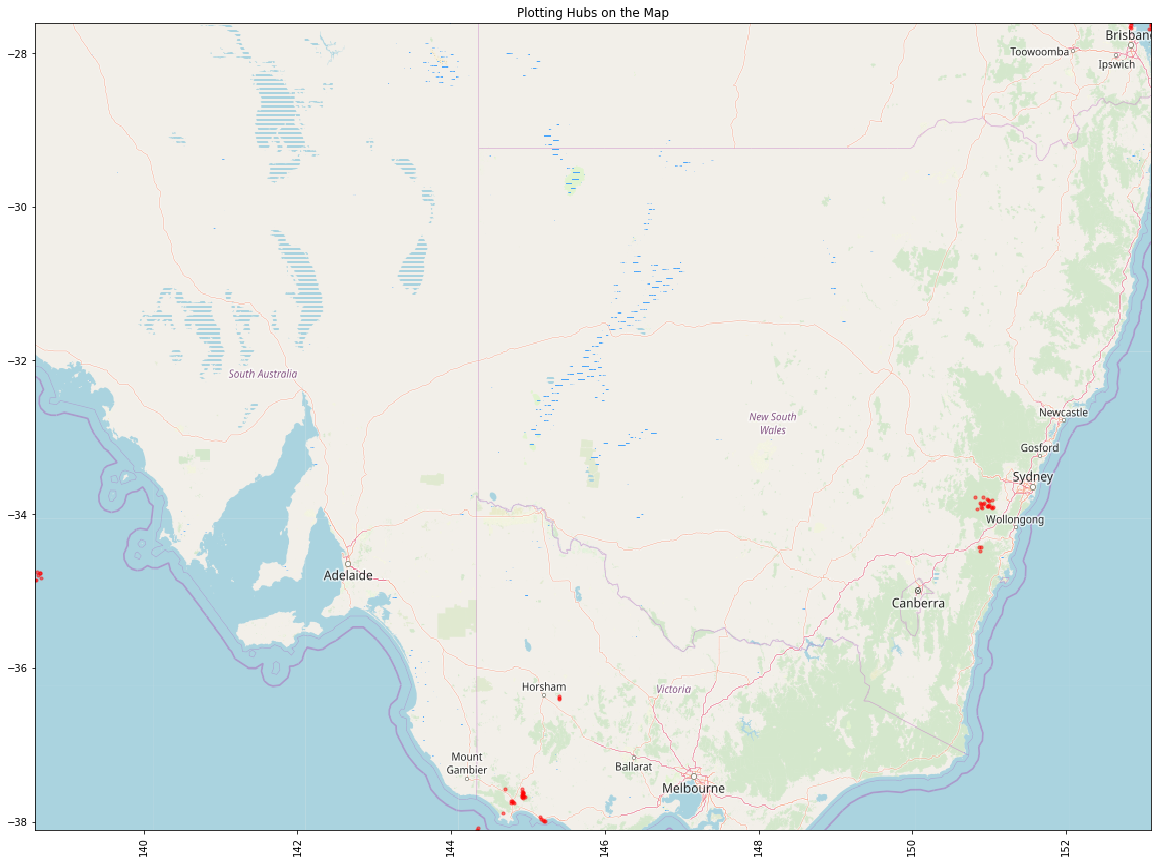

In [21]:
fig, ax = plt.subplots(figsize = (20,20))
plt.xticks(rotation=90)
ax.scatter(hub.Longitude, hub.Latitude, zorder=1, alpha= 0.5, c='r', s=10)
ax.set_title('Plotting Hubs on the Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(img_map, zorder=0, extent = BBox, aspect= 'equal')
plt.show()

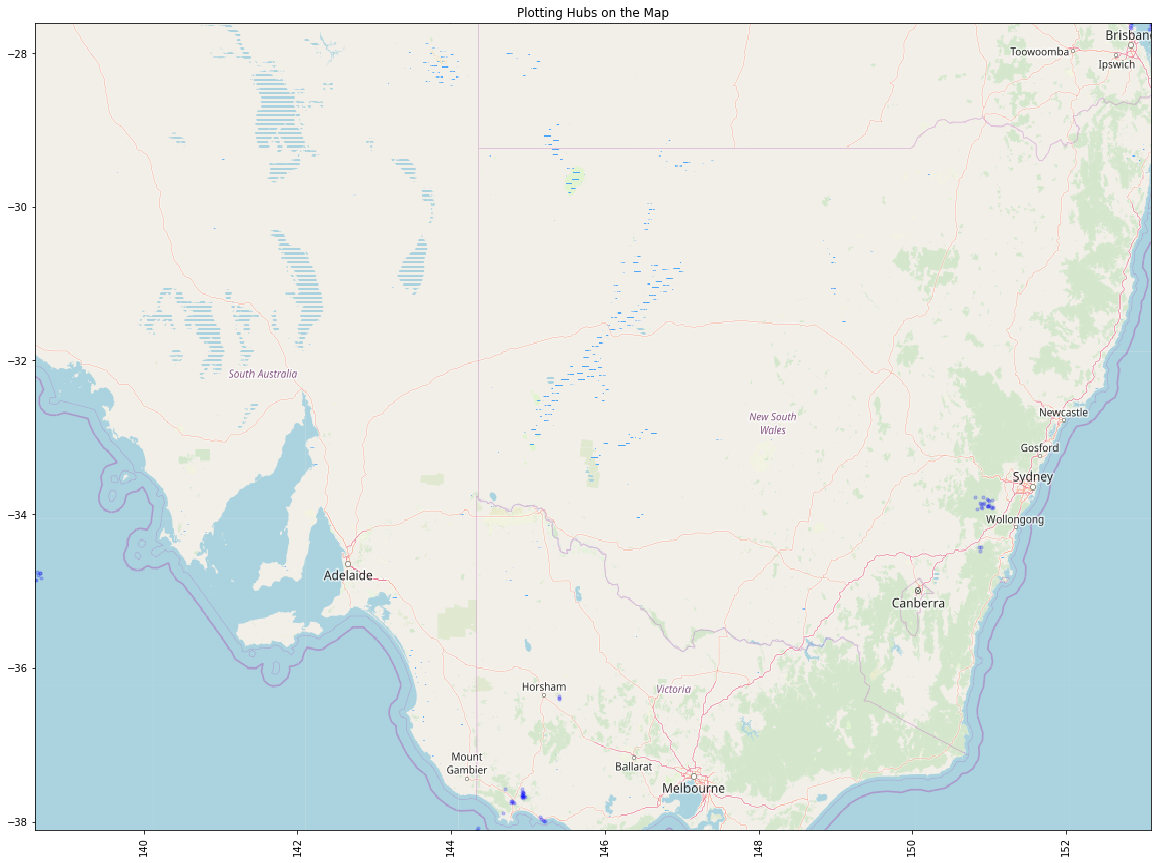

In [22]:
fig, ax = plt.subplots(figsize = (20,20))
plt.xticks(rotation=90)
ax.scatter(hub.Longitude, hub.Latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Hubs on the Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(img_map, zorder=0, extent = BBox, aspect= 'equal')
# plt.show()

In [23]:
type(BBox)

tuple

In [24]:
hub.to_csv('hub_data_1.csv', index=False)

In [25]:
hub = pd.read_csv('hub_data_1.csv')

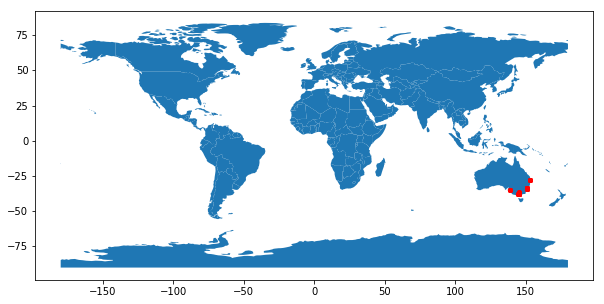

In [26]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame



geometry = [Point(xy) for xy in zip(hub['Longitude'], hub['Latitude'])]
gdf = GeoDataFrame(hub, geometry=geometry)   


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

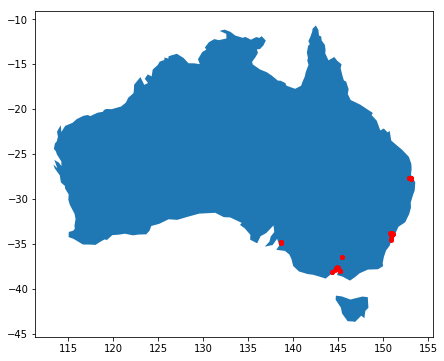

In [27]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame



geometry = [Point(xy) for xy in zip(hub['Longitude'], hub['Latitude'])]
gdf = GeoDataFrame(hub, geometry=geometry)   


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
aus = world[world.name=='Australia']
gdf.plot(ax=aus.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [28]:
# hub.drop("Unnamed: 0", axis=1, inplace=True)

In [29]:
hub.head()

Hub ID                 School Name   Location Coordinates  Latitude  \
0  CH00084  Banksia Road Public School   -33.9068 | 151.05015 -33.90680   
1  CH00001     Fernbrooke State School  -27.65852 | 152.83998 -27.65852   
2  CH00003      Riverview State School   -27.6046 | 152.84662 -27.60460   
3  CH00004    Staines Memorial College  -27.66902 | 152.84945 -27.66902   
4  CH00005        Marsden State School  -27.68563 | 153.10479 -27.68563   

   Longitude                     geometry  
0  151.05015  POINT (151.05015 -33.90680)  
1  152.83998  POINT (152.83998 -27.65852)  
2  152.84662  POINT (152.84662 -27.60460)  
3  152.84945  POINT (152.84945 -27.66902)  
4  153.10479  POINT (153.10479 -27.68563)

In [30]:
type(hub)

pandas.core.frame.DataFrame

In [31]:
hub_geo = GeoDataFrame(hub)

In [32]:
import folium

In [33]:
m = folium.Map([-37.8136, 144.9631], zoom_start = 4.3)
m

In [34]:
for index, row in hub.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']],
              tooltip=row['School Name'],              
             ).add_to(m)

In [35]:
m

In [36]:
m.save(outfile = 'hub_locations.html')

In [37]:
school = pd.read_excel('School Profile 2008-2018.xlsx', sheet_name = None)

In [38]:
school.keys()

odict_keys(['Data Dictionary', 'School Profile'])

In [39]:
school_profile = school['School Profile']

In [40]:
school_profile.to_csv('school_profile_1.csv', index=False)

In [41]:
school_profile = pd.read_csv('school_profile_1.csv')

In [42]:
# school_profile.drop('Unnamed: 0', axis = 1, inplace = True)

In [43]:
school_profile.head()

Calendar Year  ACARA SML ID  AGE ID                     School Name  \
0           2008         40000     3.0  Corpus Christi Catholic School   
1           2009         40000     3.0  Corpus Christi Catholic School   
2           2010         40000     3.0  Corpus Christi Catholic School   
3           2011         40000     3.0  Corpus Christi Catholic School   
4           2012         40000     3.0  Corpus Christi Catholic School   

      Suburb State  Postcode School Sector School Type           Campus Type  \
0  Bellerive   TAS      7018      Catholic     Primary  School Single Entity   
1  Bellerive   TAS      7018      Catholic     Primary  School Single Entity   
2  Bellerive   TAS      7018      Catholic     Primary  School Single Entity   
3  Bellerive   TAS      7018      Catholic     Primary  School Single Entity   
4  Bellerive   TAS      7018      Catholic     Primary  School Single Entity   

   ... Teaching Staff Full Time Equivalent Teaching Staff Non-Teaching Staff  \
0  ...           29.0                                19.0               12.0   
1  ...           27.0                                19.1               15.0   
2  ...           26.0                                18.6               18.0   
3  ...           25.0                                18.1               16.0   
4  ...           24.0                                18.1               16.0   

  Full Time Equivalent Non-Teaching Staff Total Enrolments Girls Enrolments  \
0                                     6.9            410.0            185.0   
1                                     8.7            409.0            184.0   
2                                    10.2            392.0            173.0   
3                                     9.0            385.0            173.0   
4                                     9.4            391.0            185.0   

   Boys Enrolments  Full Time Equivalent Enrolments  \
0            225.0                            410.0   
1            225.0                            409.0   
2            219.0                            392.0   
3            212.0                            385.0   
4            206.0                            391.0   

   Indigenous Enrolments (%)  Language Background Other Than English (%)  
0                        1.0                                         4.0  
1                        2.0                                         4.0  
2                        2.0                                         4.0  
3                        0.0                                         3.0  
4                        1.0                                         3.0  

[5 rows x 31 columns]

In [44]:
for i in school_profile.columns:
    print(i, len(school_profile[school_profile[i].isnull()]))

Calendar Year 0
ACARA SML ID 0
AGE ID 69
School Name 0
Suburb 0
State 0
Postcode 0
School Sector 0
School Type 0
Campus Type 0
Rolled Reporting Description 0
School URL 620
Governing Body 96
Governing Body URL 96
Year Range 595
Geolocation 0
ICSEA 5837
Bottom SEA Quarter (%) 10048
Lower Middle SEA Quarter (%) 10048
Upper Middle SEA Quarter (%) 10048
Top SEA Quarter (%) 10048
Teaching Staff 539
Full Time Equivalent Teaching Staff 539
Non-Teaching Staff 582
Full Time Equivalent Non-Teaching Staff 583
Total Enrolments 636
Girls Enrolments 638
Boys Enrolments 638
Full Time Equivalent Enrolments 637
Indigenous Enrolments (%) 3984
Language Background Other Than English (%) 2412


In [45]:
len(school_profile)

102134

In [46]:
len(school_profile[school_profile.isna().any(axis=1)])

14530

In [47]:
len(school_profile['School Name'].unique())

8671

In [48]:
year = list(school_profile['Calendar Year'].unique())

In [49]:
year

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

In [50]:
school_profile[(school_profile['School Name']=='Corpus Christi Catholic School') & (school_profile['Calendar Year']==2008)]

Calendar Year  ACARA SML ID  AGE ID                     School Name  \
0           2008         40000     3.0  Corpus Christi Catholic School   

      Suburb State  Postcode School Sector School Type           Campus Type  \
0  Bellerive   TAS      7018      Catholic     Primary  School Single Entity   

   ... Teaching Staff Full Time Equivalent Teaching Staff Non-Teaching Staff  \
0  ...           29.0                                19.0               12.0   

  Full Time Equivalent Non-Teaching Staff Total Enrolments Girls Enrolments  \
0                                     6.9            410.0            185.0   

   Boys Enrolments  Full Time Equivalent Enrolments  \
0            225.0                            410.0   

   Indigenous Enrolments (%)  Language Background Other Than English (%)  
0                        1.0                                         4.0  

[1 rows x 31 columns]

In [51]:
school_profile[school_profile['Calendar Year']==2008]

Calendar Year  ACARA SML ID   AGE ID  \
0                2008         40000      3.0   
11               2008         40001      4.0   
22               2008         40002      5.0   
33               2008         40003      7.0   
44               2008         40004      9.0   
55               2008         40005     10.0   
66               2008         40006     11.0   
77               2008         40007     12.0   
88               2008         40008     13.0   
99               2008         40009     18.0   
110              2008         40010     19.0   
121              2008         40011     22.0   
132              2008         40012     23.0   
143              2008         40014     26.0   
154              2008         40015     27.0   
165              2008         40016     29.0   
176              2008         40017     30.0   
187              2008         40018     31.0   
198              2008         40019     36.0   
209              2008         40020     38.0   
220              2008         40021     39.0   
231              2008         40022     40.0   
242              2008         40023     45.0   
253              2008         40024     47.0   
264              2008         40025     55.0   
275              2008         40026     56.0   
286              2008         40027     58.0   
297              2008         40028     59.0   
308              2008         40029     60.0   
319              2008         40030   2261.0   
...               ...           ...      ...   
99896            2008         50145  13312.0   
99907            2008         50146  13314.0   
99918            2008         50147  13453.0   
99929            2008         50149  13297.0   
99940            2008         50150  14589.0   
99951            2008         50151   6877.0   
99962            2008         50152  16995.0   
99973            2008         50153  15335.0   
99984            2008         50155  13284.0   
99995            2008         50156  14276.0   
100006           2008         50157  15415.0   
100017           2008         50159  16521.0   
100028           2008         50160  14570.0   
100039           2008         50161   4218.0   
100050           2008         50162  18021.0   
100061           2008         50163  18020.0   
100072           2008         50164  27652.0   
100143           2008         50190  16073.0   
100160           2008         50200  28489.0   
100198           2008         50215   5278.0   
100236           2008         50221    368.0   
100256           2008         50227  29018.0   
100267           2008         50230  28851.0   
100278           2008         50240  16453.0   
100513           2008         50303  29139.0   
100798           2008         50376   6655.0   
100919           2008         50402  29065.0   
101431           2008         50594  77650.0   
101596           2008         50702  28485.0   
101880           2008         52249  26839.0   

                                        School Name           Suburb State  \
0                    Corpus Christi Catholic School        Bellerive   TAS   
11                                     Fahan School        Sandy Bay   TAS   
22                         Geneva Christian College          Latrobe   TAS   
33                      Holy Rosary Catholic School        Claremont   TAS   
44         Immaculate Heart of Mary Catholic School     Lenah Valley   TAS   
55                               John Calvin School       Launceston   TAS   
66                        Larmenier Catholic School      St Leonards   TAS   
77                 Launceston Church Grammar School          Mowbray   TAS   
88                        St James Catholic College           Cygnet   TAS   
99              Our Lady of Lourdes Catholic School        Devonport   TAS   
110               Our Lady of Mercy Catholic School        Deloraine   TAS   
121                    Sacred Heart Catholic School       Ulverstone   TAS   
132              

In [52]:
school_profile[school_profile['School Name']=='Corpus Christi Catholic School']

Calendar Year  ACARA SML ID  AGE ID                     School Name  \
0            2008         40000     3.0  Corpus Christi Catholic School   
1            2009         40000     3.0  Corpus Christi Catholic School   
2            2010         40000     3.0  Corpus Christi Catholic School   
3            2011         40000     3.0  Corpus Christi Catholic School   
4            2012         40000     3.0  Corpus Christi Catholic School   
5            2013         40000     3.0  Corpus Christi Catholic School   
6            2014         40000     3.0  Corpus Christi Catholic School   
7            2015         40000     3.0  Corpus Christi Catholic School   
8            2016         40000     3.0  Corpus Christi Catholic School   
9            2017         40000     3.0  Corpus Christi Catholic School   
10           2018         40000     3.0  Corpus Christi Catholic School   

       Suburb State  Postcode School Sector School Type           Campus Type  \
0   Bellerive   TAS      7018      Catholic     Primary  School Single Entity   
1   Bellerive   TAS      7018      Catholic     Primary  School Single Entity   
2   Bellerive   TAS      7018      Catholic     Primary  School Single Entity   
3   Bellerive   TAS      7018      Catholic     Primary  School Single Entity   
4   Bellerive   TAS      7018      Catholic     Primary  School Single Entity   
5   Bellerive   TAS      7018      Catholic     Primary  School Single Entity   
6   Bellerive   TAS      7018      Catholic     Primary  School Single Entity   
7   Bellerive   TAS      7018      Catholic     Primary  School Single Entity   
8   Bellerive   TAS      7018      Catholic     Primary  School Single Entity   
9   Bellerive   TAS      7018      Catholic     Primary  School Single Entity   
10  Bellerive   TAS      7018      Catholic     Primary  School Single Entity   

    ... Teaching Staff Full Time Equivalent Teaching Staff Non-Teaching Staff  \
0   ...           29.0                                19.0               12.0   
1   ...           27.0                                19.1               15.0   
2   ...           26.0                                18.6               18.0   
3   ...           25.0                                18.1               16.0   
4   ...           24.0                                18.1               16.0   
5   ...           25.0                                18.0               17.0   
6   ...           26.0                                18.6               17.0   
7   ...           26.0                                20.3               18.0   
8   ...           29.0                                20.8               16.0   
9   ...           29.0                                20.4               16.0   
10  ...           29.0                                20.8               18.0   

   Full Time Equivalent Non-Teaching Staff Total Enrolments Girls Enrolments  \
0                                      6.9            410.0            185.0   
1                                      8.7            409.0            184.0   
2                                     10.2            392.0            173.0   
3                                      9.0            385.0            173.0   
4                                      9.4            391.0            185.0   
5                                      9.9            388.0            185.0   
6                                      9.6            387.0            193.0   
7                                     10.6            395.0            193.0   
8                                      9.7            398.0            194.0   
9                                      9.4            399.0            194.0   
10                                    10.3            380.0            179.0   

    Boys Enrolments  Full Time Equivalent Enrolments  \
0             225.0                            410.0   
1             225.0                            409.0   
2             219.0         

In [53]:
school_profile['unique_col'] = school_profile['School Name'].astype(str) + school_profile['Postcode'].astype(str)

In [54]:
school_profile.dtypes

Calendar Year                                   int64
ACARA SML ID                                    int64
AGE ID                                        float64
School Name                                    object
Suburb                                         object
State                                          object
Postcode                                        int64
School Sector                                  object
School Type                                    object
Campus Type                                    object
Rolled Reporting Description                   object
School URL                                     object
Governing Body                                 object
Governing Body URL                             object
Year Range                                     object
Geolocation                                    object
ICSEA                                         float64
Bottom SEA Quarter (%)                        float64
Lower Middle SEA Quarter (%)

In [55]:
len(school_profile)

102134

In [56]:
school_profile.drop_duplicates()

Calendar Year  ACARA SML ID   AGE ID  \
0                2008         40000      3.0   
1                2009         40000      3.0   
2                2010         40000      3.0   
3                2011         40000      3.0   
4                2012         40000      3.0   
5                2013         40000      3.0   
6                2014         40000      3.0   
7                2015         40000      3.0   
8                2016         40000      3.0   
9                2017         40000      3.0   
10               2018         40000      3.0   
11               2008         40001      4.0   
12               2009         40001      4.0   
13               2010         40001      4.0   
14               2011         40001      4.0   
15               2012         40001      4.0   
16               2013         40001      4.0   
17               2014         40001      4.0   
18               2015         40001      4.0   
19               2016         40001      4.0   
20               2017         40001      4.0   
21               2018         40001      4.0   
22               2008         40002      5.0   
23               2009         40002      5.0   
24               2010         40002      5.0   
25               2011         40002      5.0   
26               2012         40002      5.0   
27               2013         40002      5.0   
28               2014         40002      5.0   
29               2015         40002      5.0   
...               ...           ...      ...   
102104           2018         52590      NaN   
102105           2018         52591      NaN   
102106           2018         52592      NaN   
102107           2018         52593      NaN   
102108           2018         52594      NaN   
102109           2018         52595      NaN   
102110           2018         52604  85196.0   
102111           2018         52605  85148.0   
102112           2018         52607      NaN   
102113           2018         52608  85138.0   
102114           2018         52609  85140.0   
102115           2018         52610  85142.0   
102116           2018         52611  85144.0   
102117           2018         52613  85126.0   
102118           2018         52614  85100.0   
102119           2018         52615  85120.0   
102120           2018         52616      NaN   
102121           2018         52617  85159.0   
102122           2018         52620  85097.0   
102123           2018         52621  85086.0   
102124           2018         52622  85079.0   
102125           2018         52633  85108.0   
102126           2018         52634  85106.0   
102127           2018         52636  85134.0   
102128           2018         52640  85161.0   
102129           2018         52665  85184.0   
102130           2018         52670  28862.0   
102131           2018         52671      NaN   
102132           2018         52683      NaN   
102133           2018         52687      NaN   

                                              School Name           Suburb  \
0                          Corpus Christi Catholic School        Bellerive   
1                          Corpus Christi Catholic School        Bellerive   
2                          Corpus Christi Catholic School        Bellerive   
3                          Corpus Christi Catholic School        Bellerive   
4                          Corpus Christi Catholic School        Bellerive   
5                          Corpus Christi Catholic School        Bellerive   
6                          Corpus Christi Catholic School        Bellerive   
7                          Corpus Christi Catholic School        Bellerive   
8                          Corpus Christi Catholic School        Bellerive   
9                          Corpus Christi Catholic School        Bellerive   
10                         Corpus Christi Catholic School        Bellerive   
11                                           Fahan School        Sandy Bay   
12               

In [57]:
school_profile[school_profile['Calendar Year'] == 2008].drop_duplicates(subset=['unique_col'])

Calendar Year  ACARA SML ID   AGE ID  \
0                2008         40000      3.0   
11               2008         40001      4.0   
22               2008         40002      5.0   
33               2008         40003      7.0   
44               2008         40004      9.0   
55               2008         40005     10.0   
66               2008         40006     11.0   
77               2008         40007     12.0   
88               2008         40008     13.0   
99               2008         40009     18.0   
110              2008         40010     19.0   
121              2008         40011     22.0   
132              2008         40012     23.0   
143              2008         40014     26.0   
154              2008         40015     27.0   
165              2008         40016     29.0   
176              2008         40017     30.0   
187              2008         40018     31.0   
198              2008         40019     36.0   
209              2008         40020     38.0   
220              2008         40021     39.0   
231              2008         40022     40.0   
242              2008         40023     45.0   
253              2008         40024     47.0   
264              2008         40025     55.0   
275              2008         40026     56.0   
286              2008         40027     58.0   
297              2008         40028     59.0   
308              2008         40029     60.0   
319              2008         40030   2261.0   
...               ...           ...      ...   
99896            2008         50145  13312.0   
99907            2008         50146  13314.0   
99918            2008         50147  13453.0   
99929            2008         50149  13297.0   
99940            2008         50150  14589.0   
99951            2008         50151   6877.0   
99962            2008         50152  16995.0   
99973            2008         50153  15335.0   
99984            2008         50155  13284.0   
99995            2008         50156  14276.0   
100006           2008         50157  15415.0   
100017           2008         50159  16521.0   
100028           2008         50160  14570.0   
100039           2008         50161   4218.0   
100050           2008         50162  18021.0   
100061           2008         50163  18020.0   
100072           2008         50164  27652.0   
100143           2008         50190  16073.0   
100160           2008         50200  28489.0   
100198           2008         50215   5278.0   
100236           2008         50221    368.0   
100256           2008         50227  29018.0   
100267           2008         50230  28851.0   
100278           2008         50240  16453.0   
100513           2008         50303  29139.0   
100798           2008         50376   6655.0   
100919           2008         50402  29065.0   
101431           2008         50594  77650.0   
101596           2008         50702  28485.0   
101880           2008         52249  26839.0   

                                        School Name           Suburb State  \
0                    Corpus Christi Catholic School        Bellerive   TAS   
11                                     Fahan School        Sandy Bay   TAS   
22                         Geneva Christian College          Latrobe   TAS   
33                      Holy Rosary Catholic School        Claremont   TAS   
44         Immaculate Heart of Mary Catholic School     Lenah Valley   TAS   
55                               John Calvin School       Launceston   TAS   
66                        Larmenier Catholic School      St Leonards   TAS   
77                 Launceston Church Grammar School          Mowbray   TAS   
88                        St James Catholic College           Cygnet   TAS   
99              Our Lady of Lourdes Catholic School        Devonport   TAS   
110               Our Lady of Mercy Catholic School        Deloraine   TAS   
121                    Sacred Heart Catholic School       Ulverstone   TAS   
132              

In [58]:
school_2008 = school_profile[school_profile['Calendar Year'] == 2008]

In [59]:
import seaborn as sns

C:\Users\Rishabh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Rishabh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


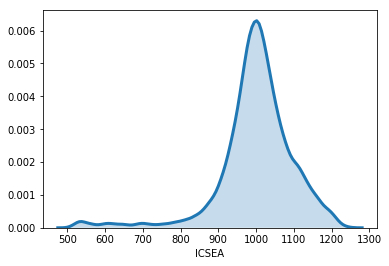

In [60]:
sns.distplot(school_2008['ICSEA'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})
plt.show()

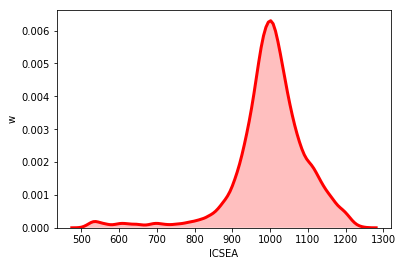

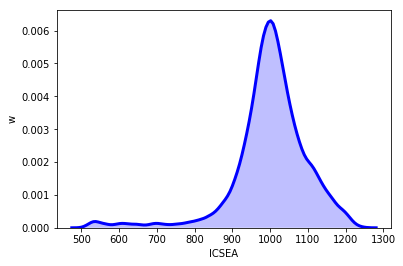

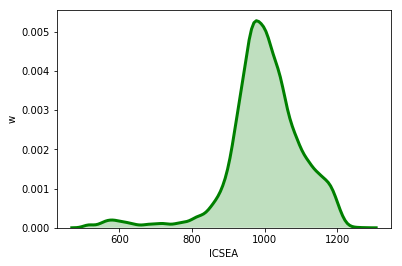

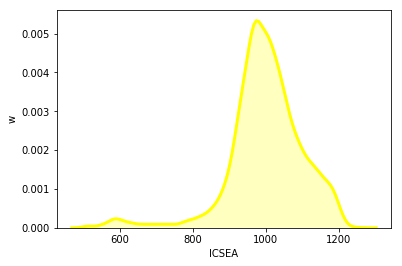

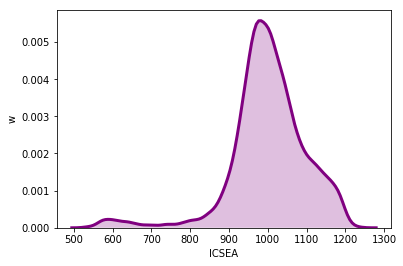

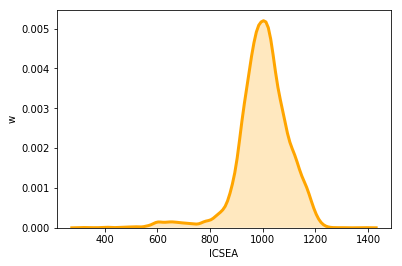

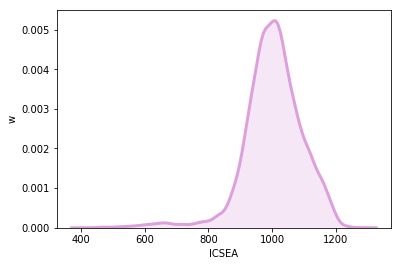

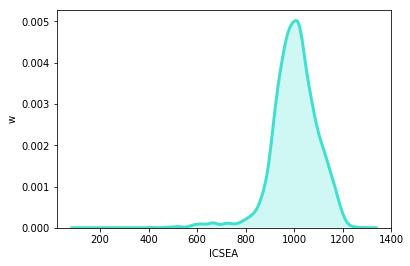

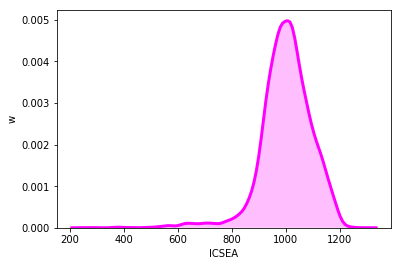

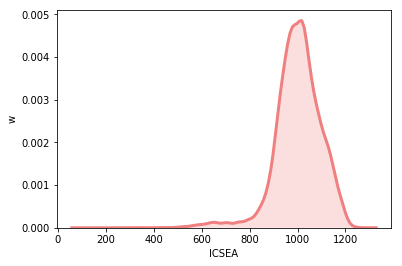

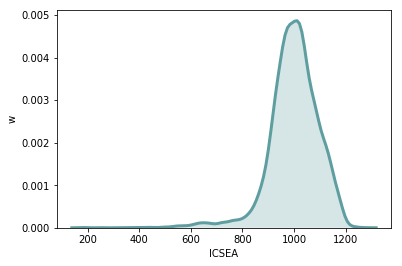

In [61]:
# https://python-graph-gallery.com/python-colors/
j = 0
col_dist = ['red', 'blue','green', 'yellow', 'purple', 'orange', 'plum', 'turquoise', 'fuchsia', 'lightcoral', 'cadetblue']
for i in year:
    sns.distplot(school_profile[school_profile['Calendar Year'] == i]['ICSEA'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, color = col_dist[j]).set(ylabel = 'w')
    plt.show()
    j+=1

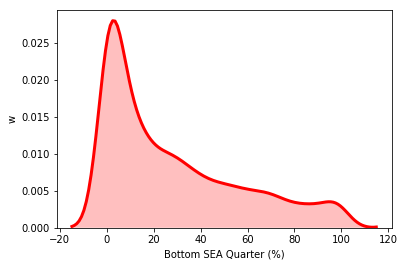

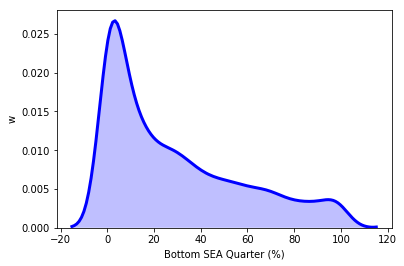

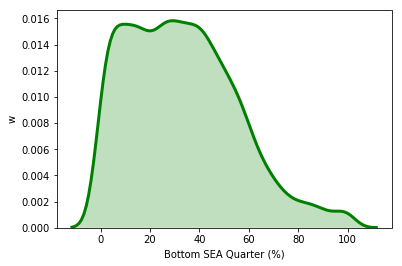

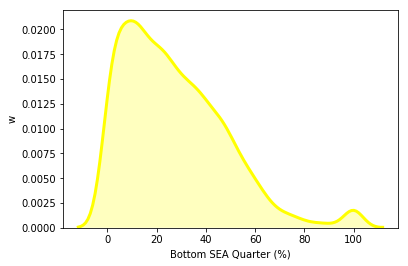

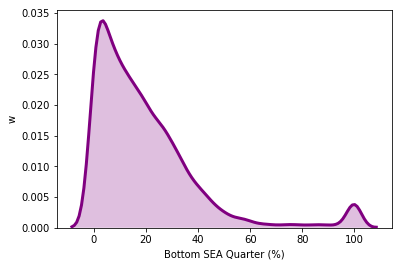

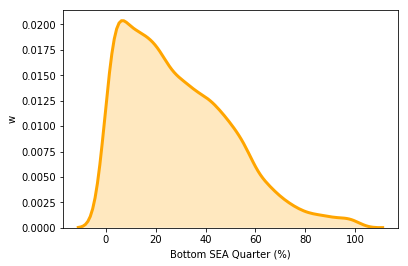

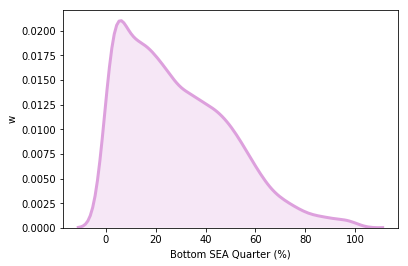

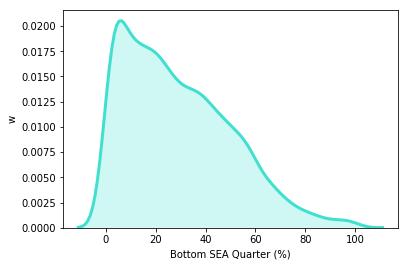

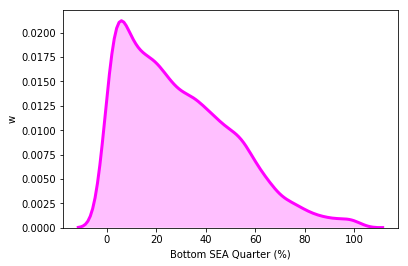

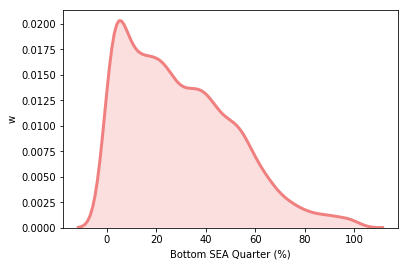

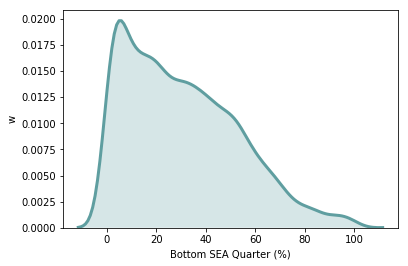

In [62]:
# https://python-graph-gallery.com/python-colors/
j = 0
col_dist = ['red', 'blue','green', 'yellow', 'purple', 'orange', 'plum', 'turquoise', 'fuchsia', 'lightcoral', 'cadetblue']
for i in year:
    sns.distplot(school_profile[school_profile['Calendar Year'] == i]['Bottom SEA Quarter (%)'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, color = col_dist[j]).set(ylabel = 'w')
    plt.show()
    j+=1

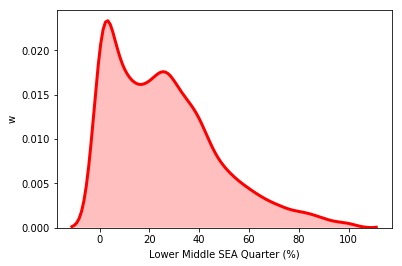

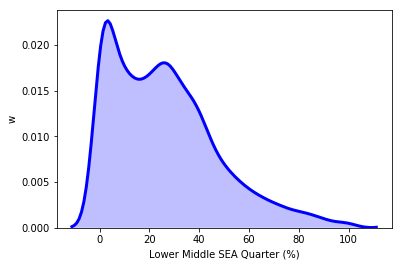

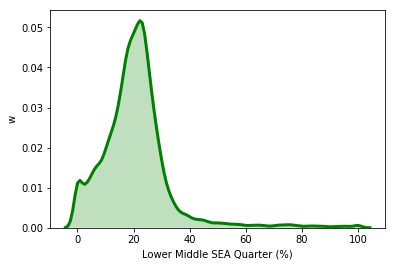

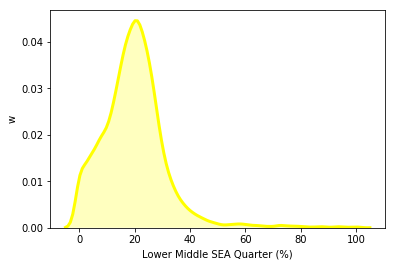

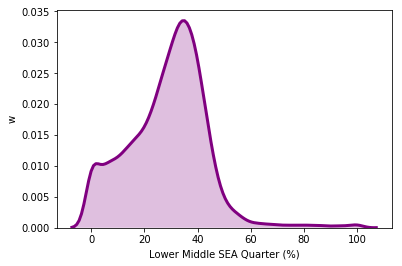

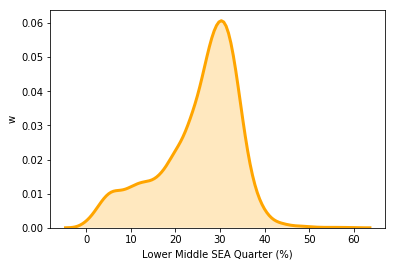

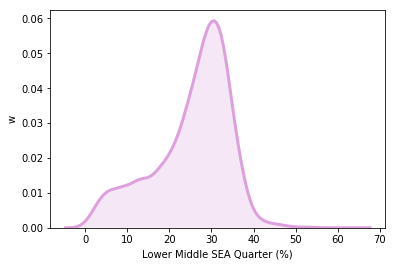

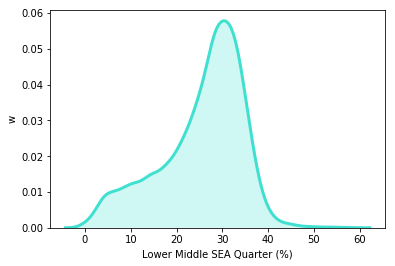

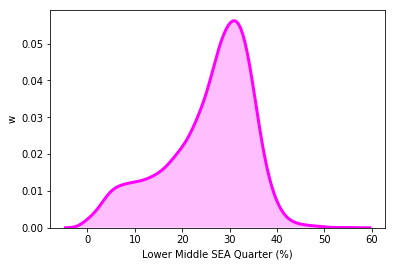

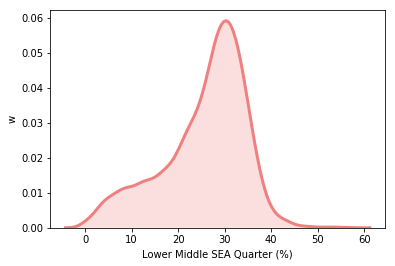

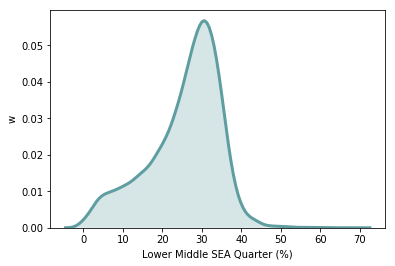

In [63]:
j = 0
col_dist = ['red', 'blue','green', 'yellow', 'purple', 'orange', 'plum', 'turquoise', 'fuchsia', 'lightcoral', 'cadetblue']
for i in year:
    sns.distplot(school_profile[school_profile['Calendar Year'] == i]['Lower Middle SEA Quarter (%)'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, color = col_dist[j]).set(ylabel = 'w')
    plt.show()
    j+=1

In [64]:
'ICSEA','Bottom SEA Quarter (%)','Lower Middle SEA Quarter (%)'

('ICSEA', 'Bottom SEA Quarter (%)', 'Lower Middle SEA Quarter (%)')

In [65]:
list_params = ['ICSEA','Bottom SEA Quarter (%)','Lower Middle SEA Quarter (%)','Upper Middle SEA Quarter (%)','Top SEA Quarter (%)','Teaching Staff','Full Time Equivalent Teaching Staff','Non-Teaching Staff','Full Time Equivalent Non-Teaching Staff','Total Enrolments','Girls Enrolments','Boys Enrolments','Full Time Equivalent Enrolments','Indigenous Enrolments (%)','Language Background Other Than English (%)']

Plotting for -----  ICSEA


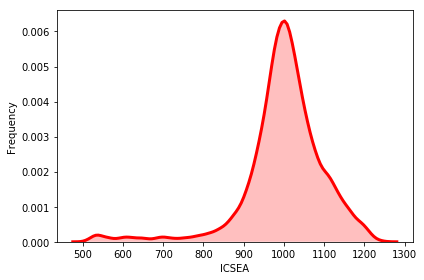

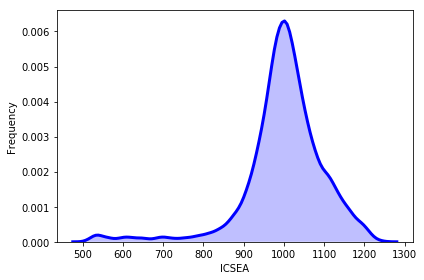

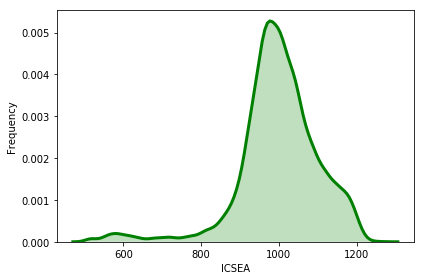

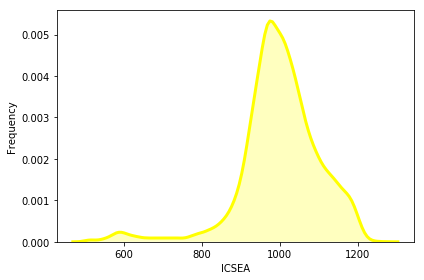

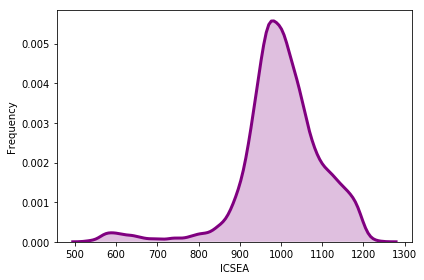

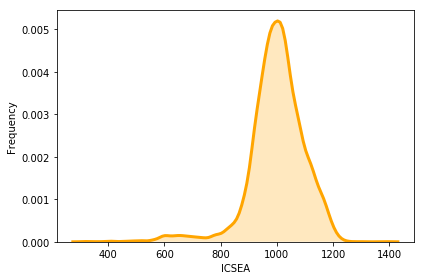

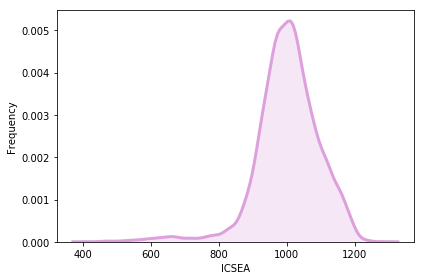

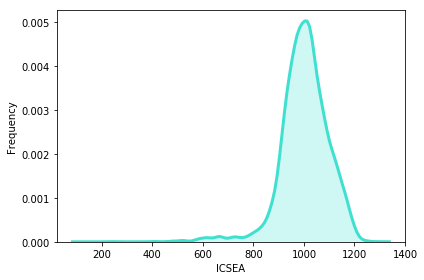

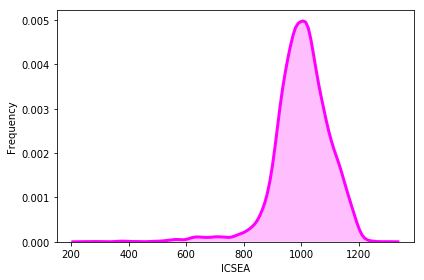

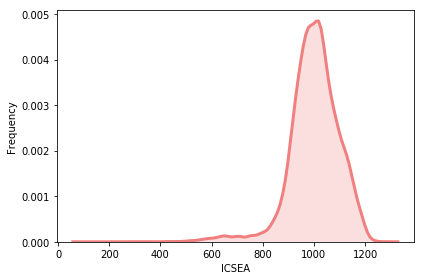

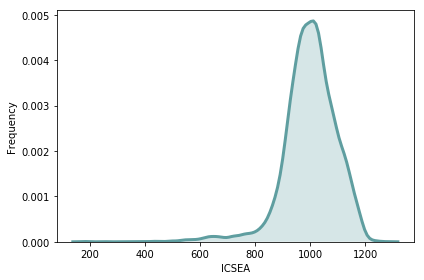

Plotting for -----  Bottom SEA Quarter (%)


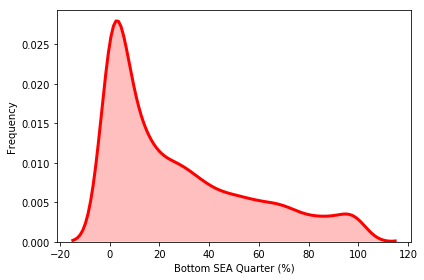

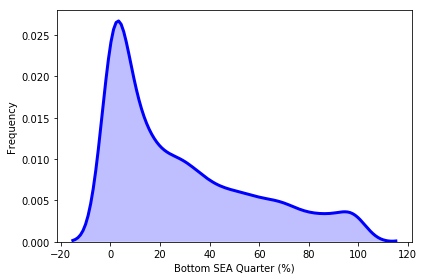

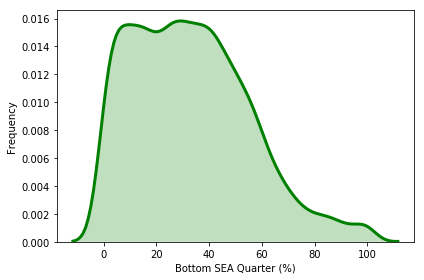

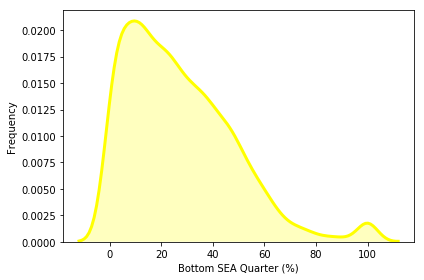

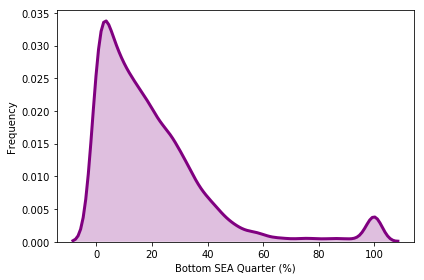

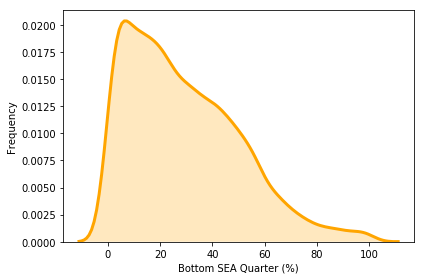

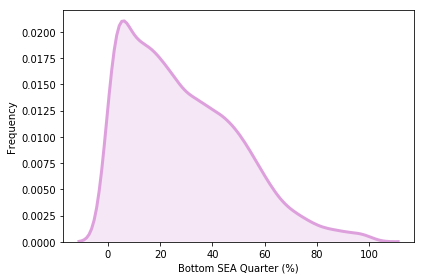

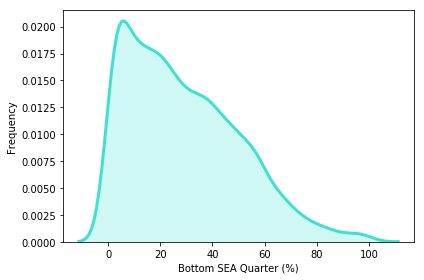

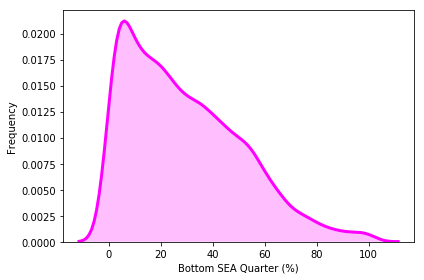

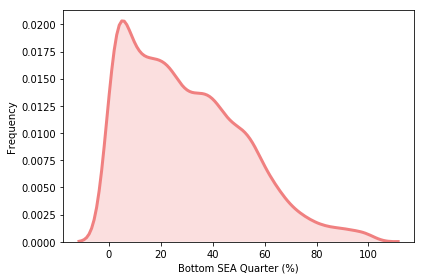

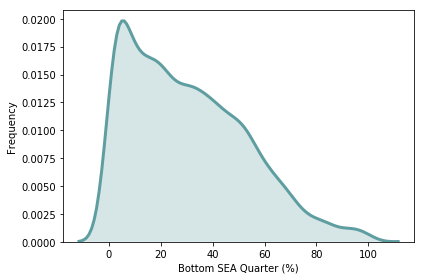

Plotting for -----  Lower Middle SEA Quarter (%)


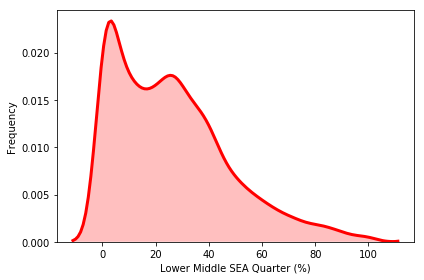

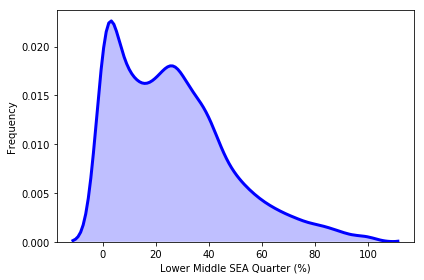

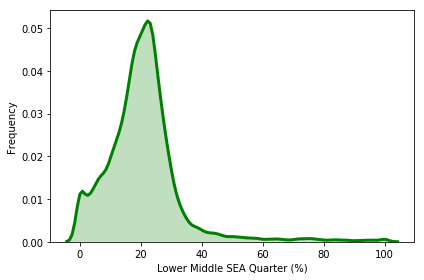

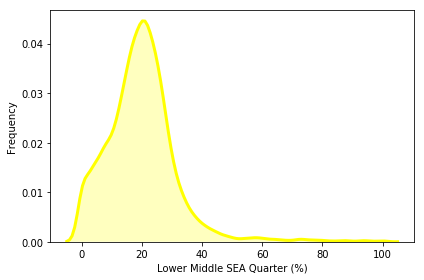

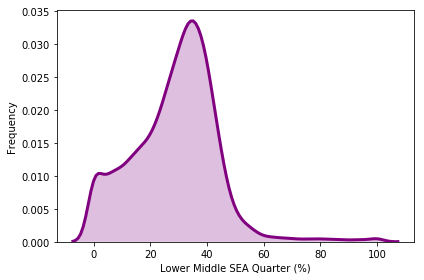

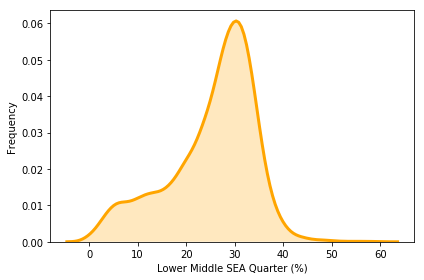

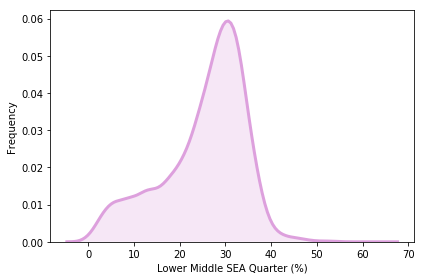

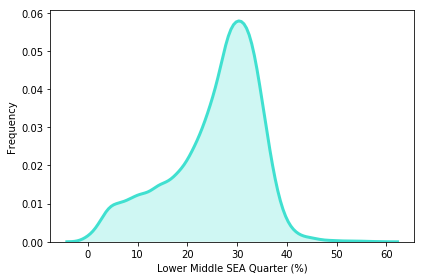

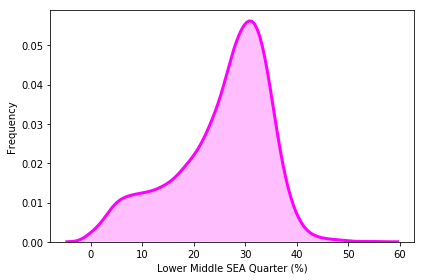

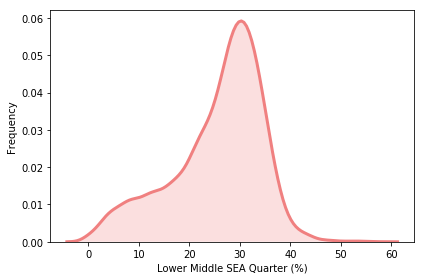

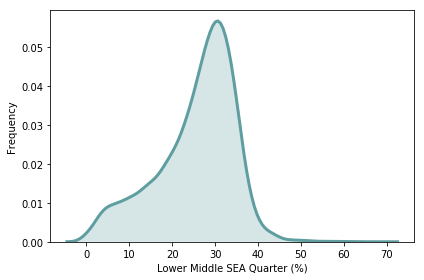

Plotting for -----  Upper Middle SEA Quarter (%)


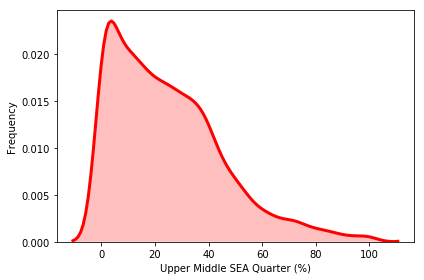

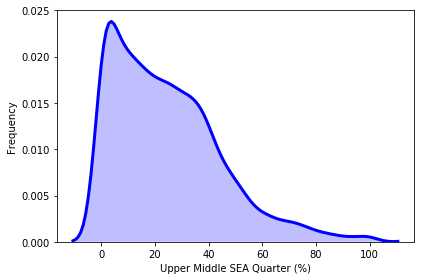

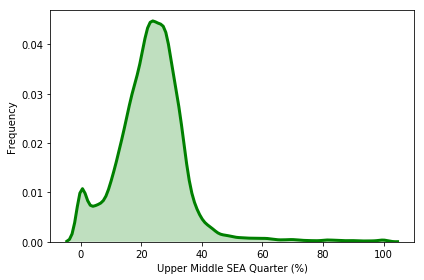

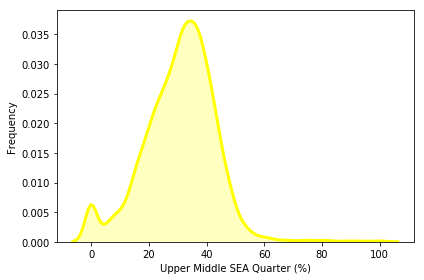

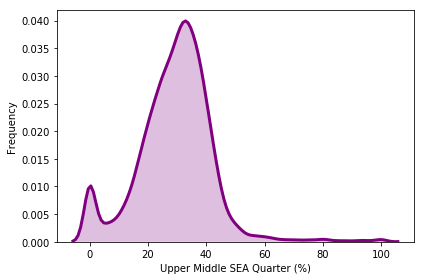

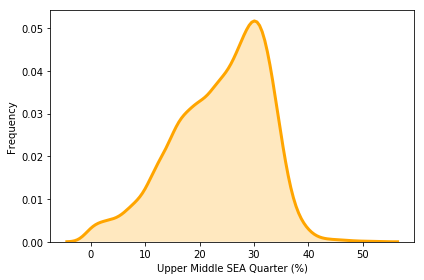

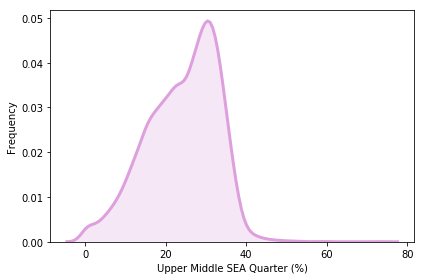

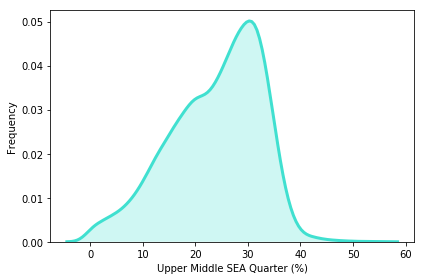

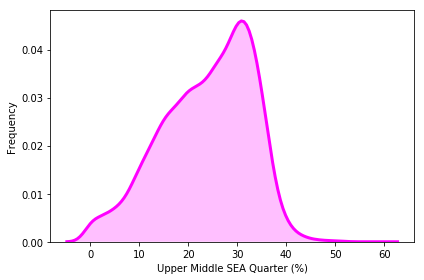

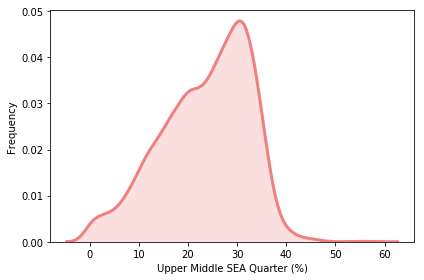

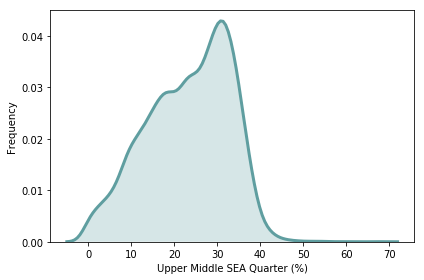

Plotting for -----  Top SEA Quarter (%)


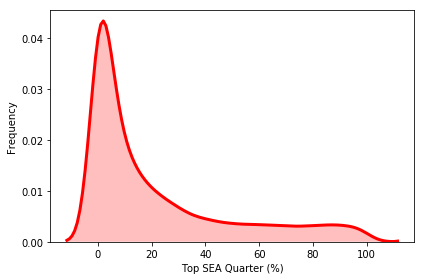

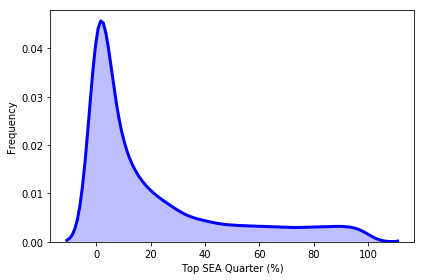

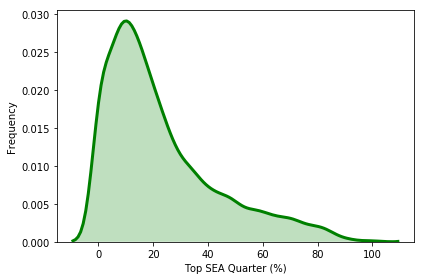

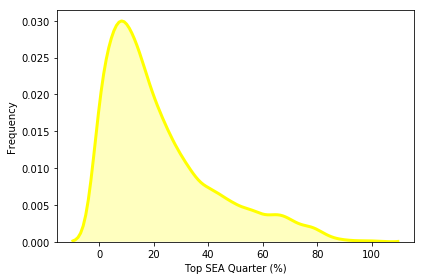

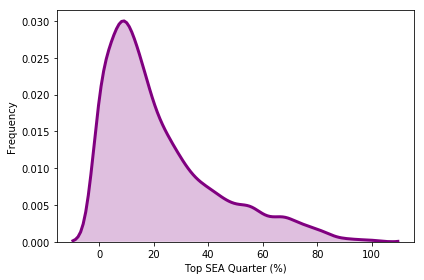

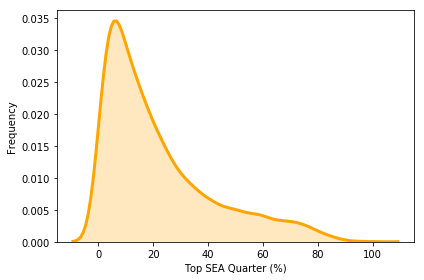

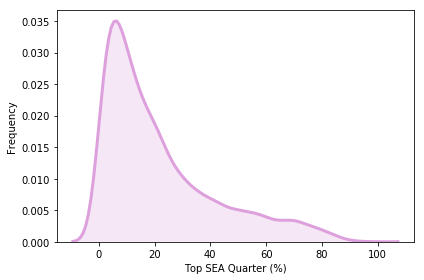

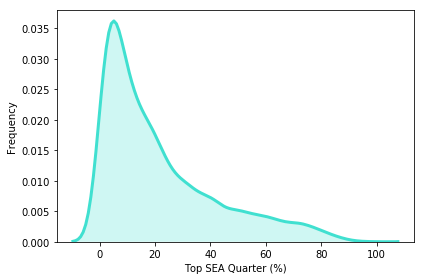

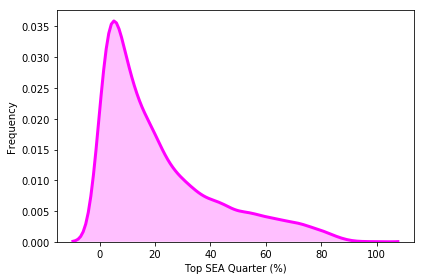

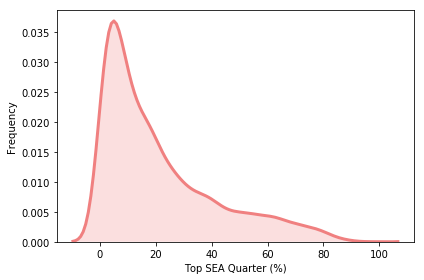

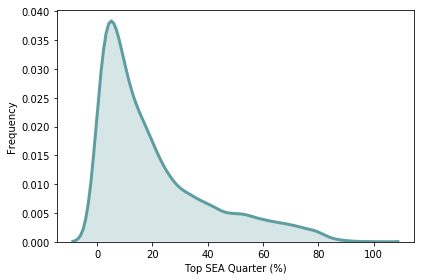

Plotting for -----  Teaching Staff


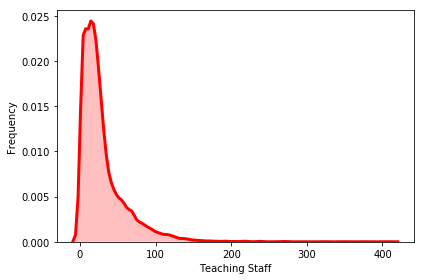

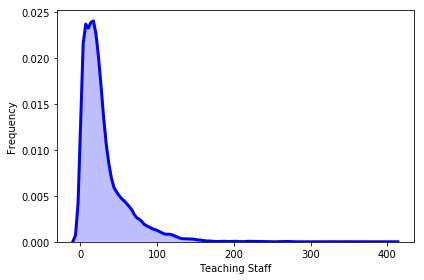

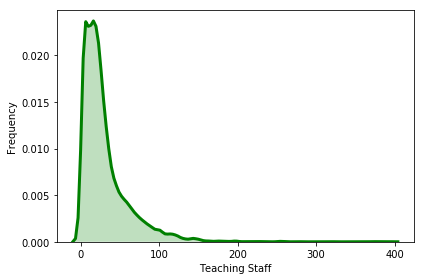

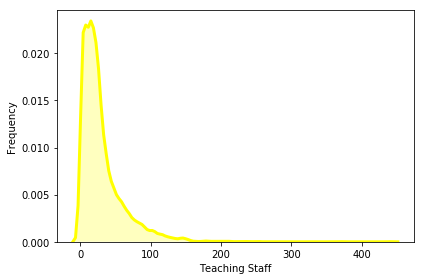

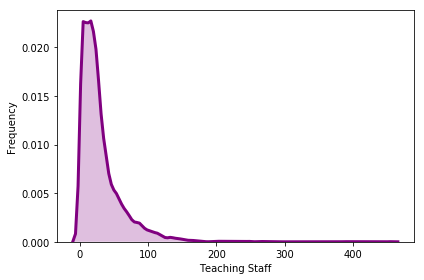

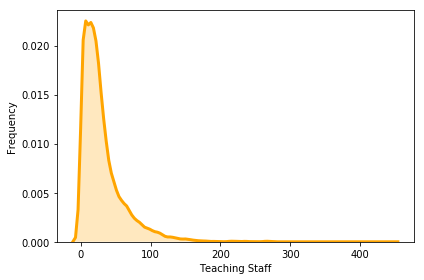

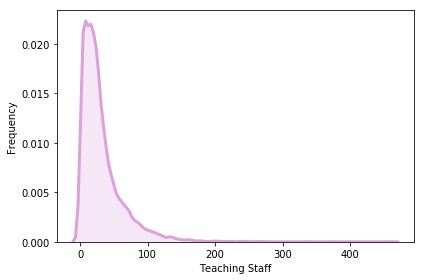

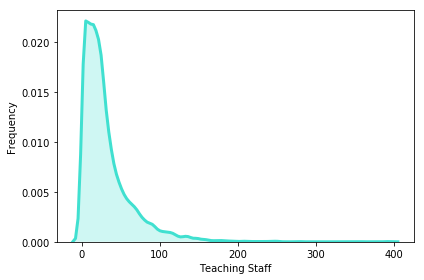

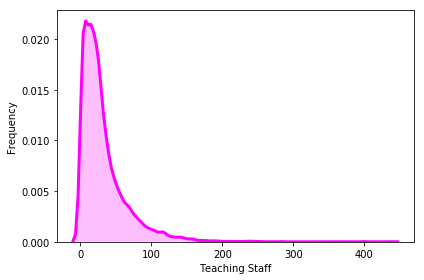

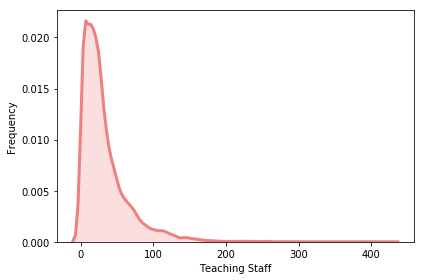

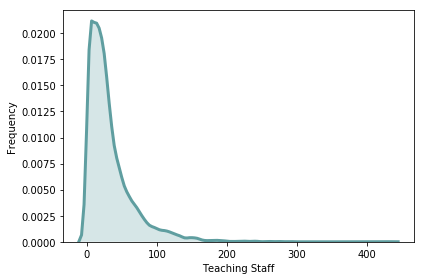

Plotting for -----  Full Time Equivalent Teaching Staff


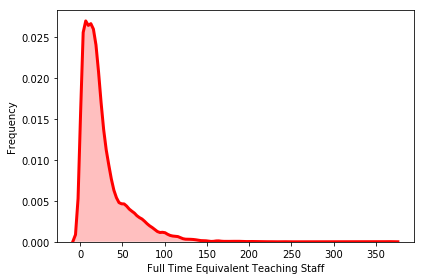

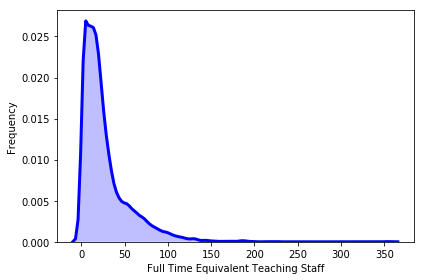

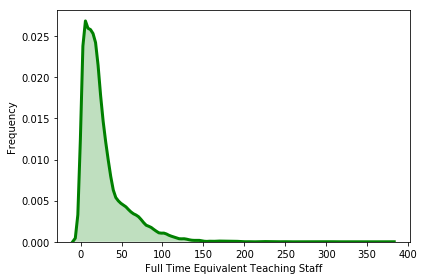

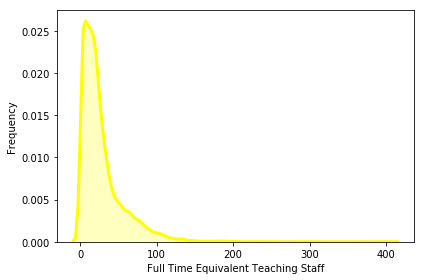

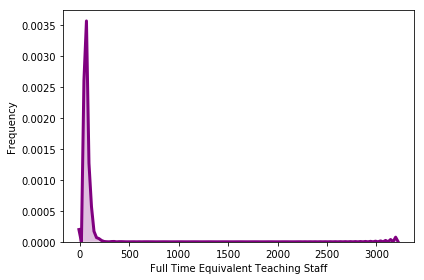

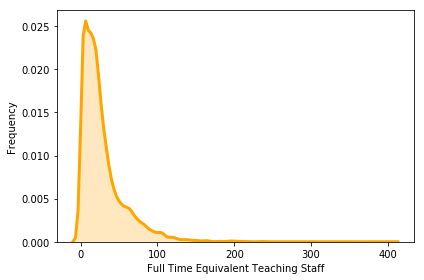

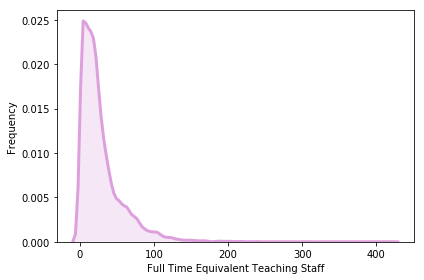

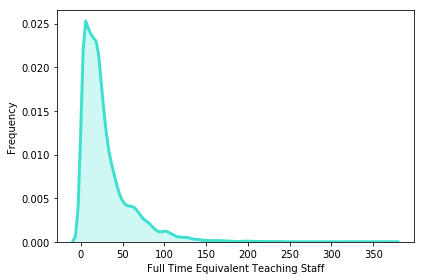

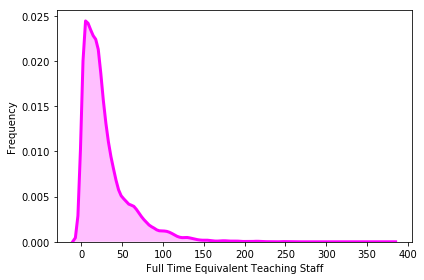

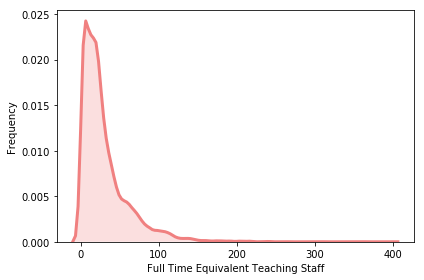

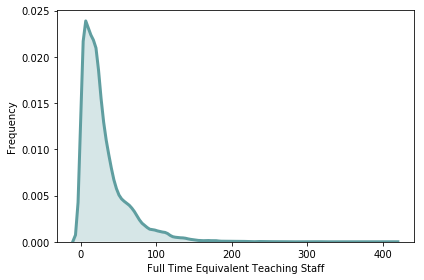

Plotting for -----  Non-Teaching Staff


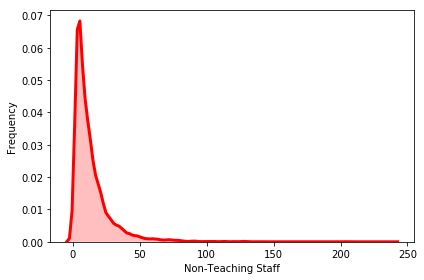

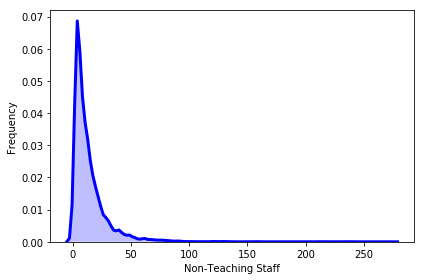

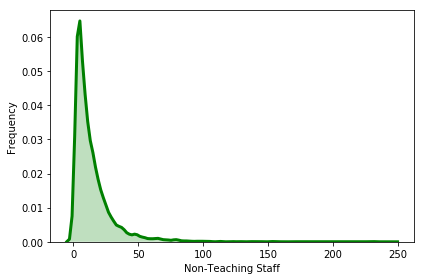

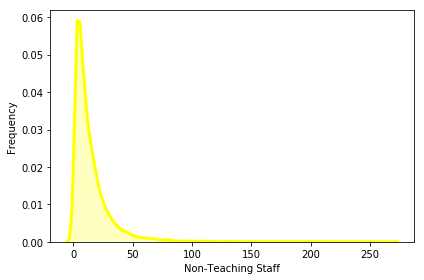

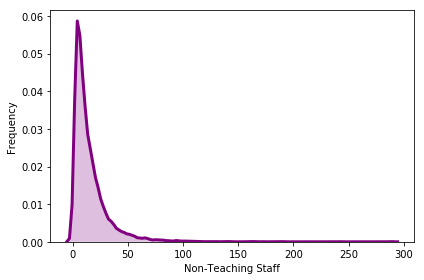

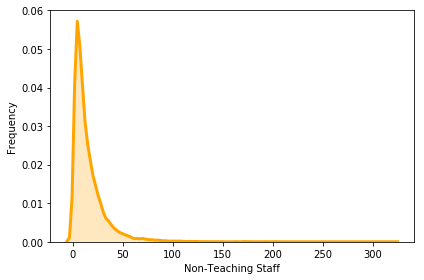

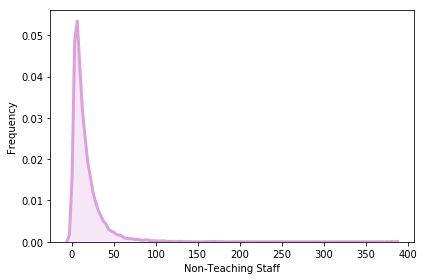

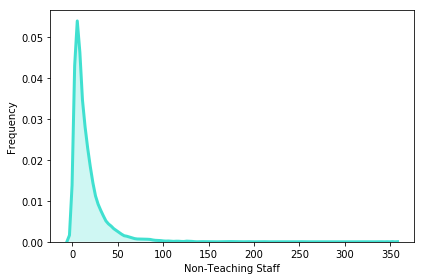

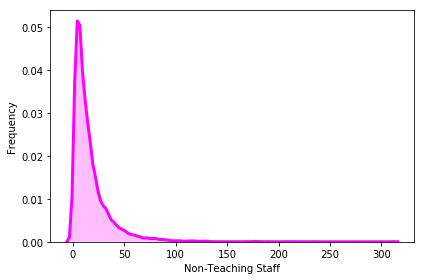

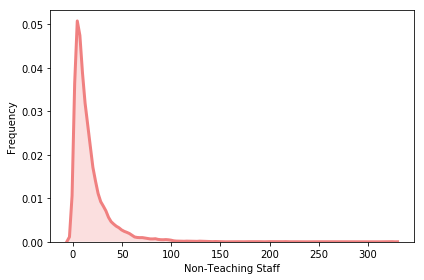

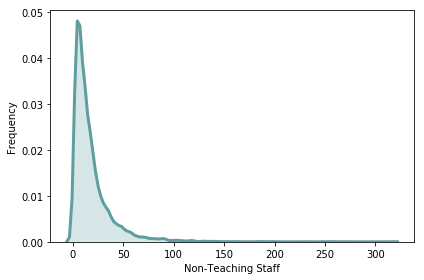

Plotting for -----  Full Time Equivalent Non-Teaching Staff


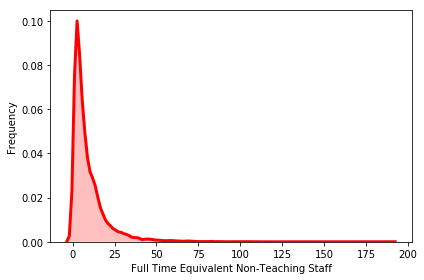

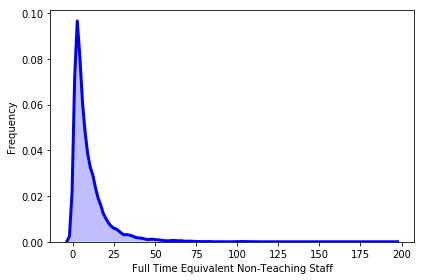

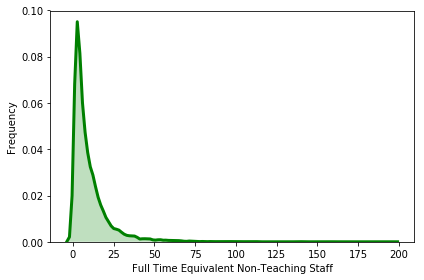

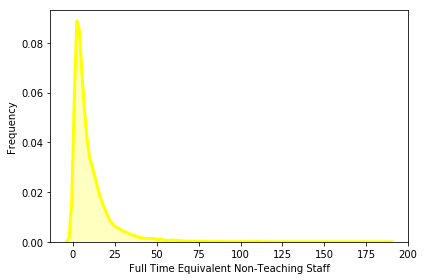

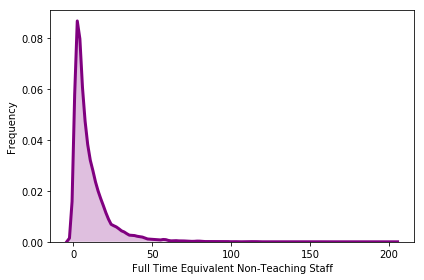

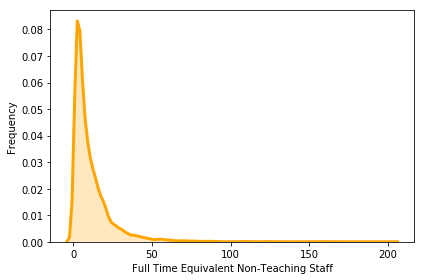

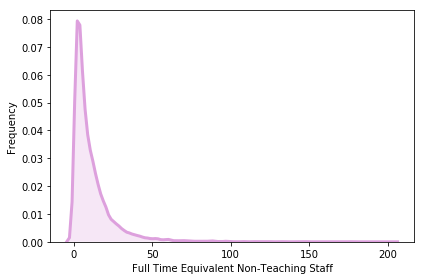

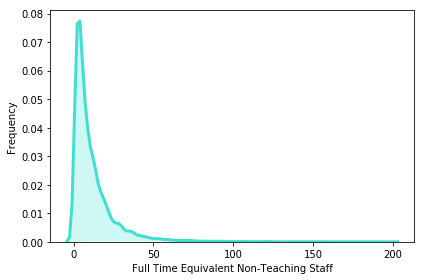

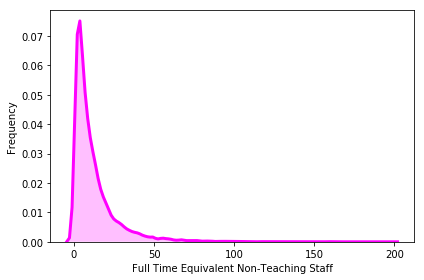

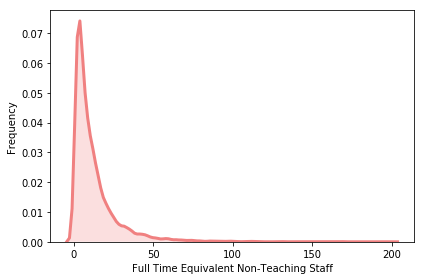

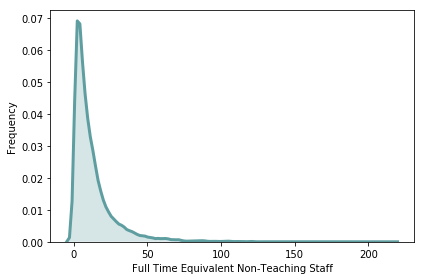

Plotting for -----  Total Enrolments


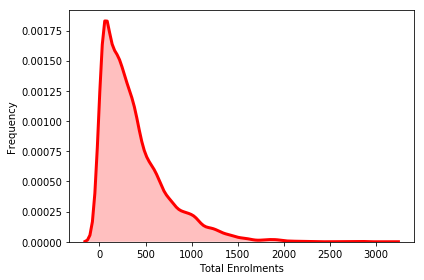

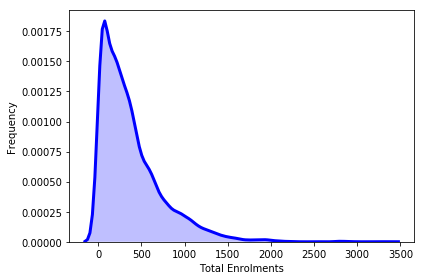

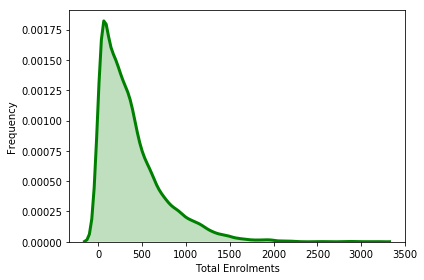

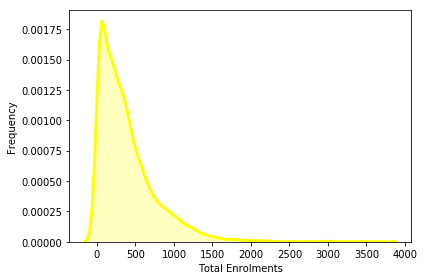

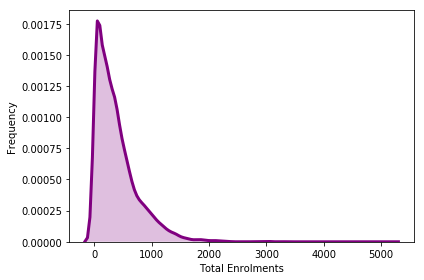

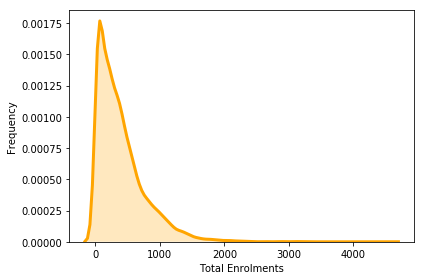

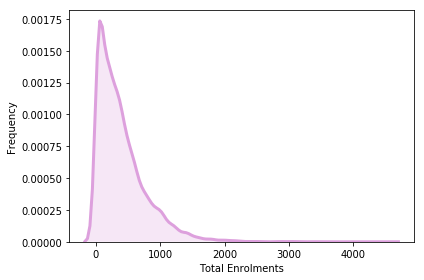

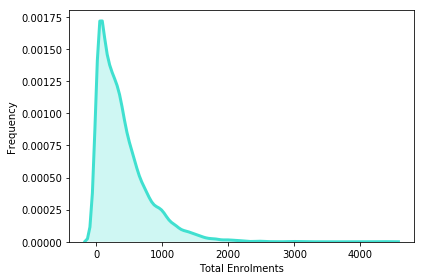

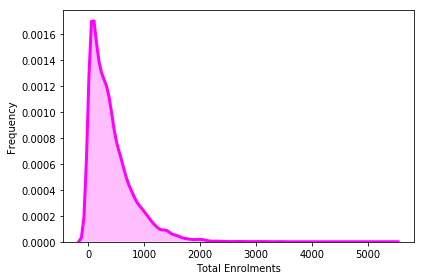

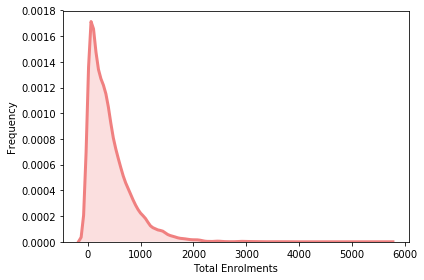

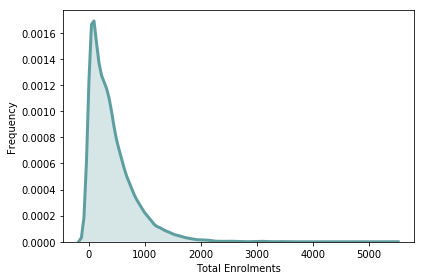

Plotting for -----  Girls Enrolments


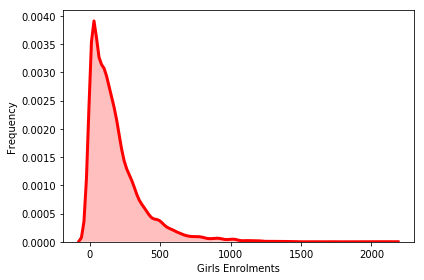

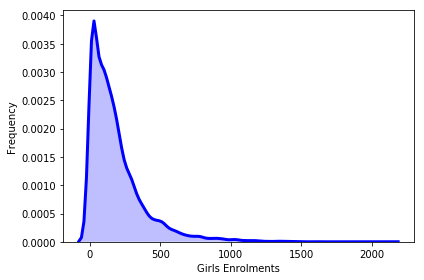

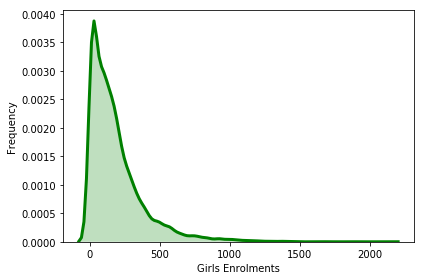

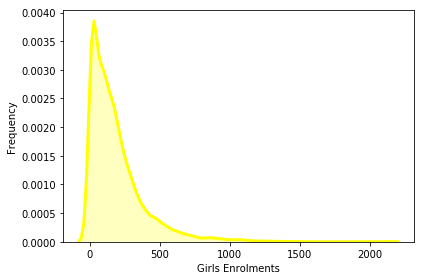

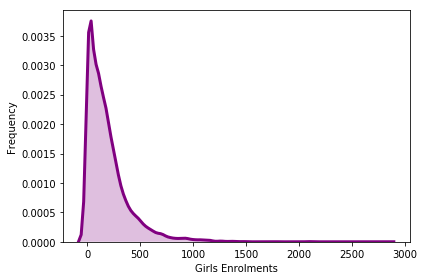

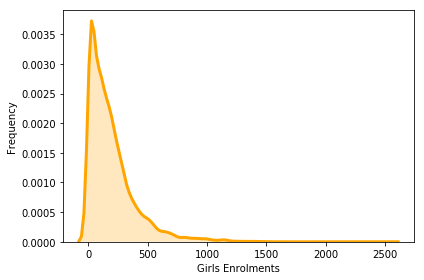

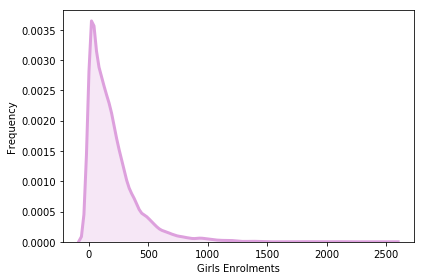

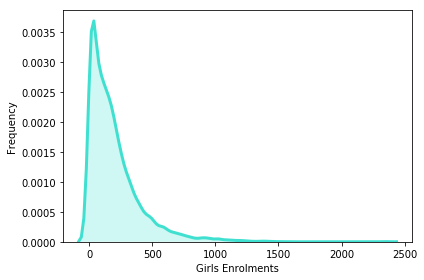

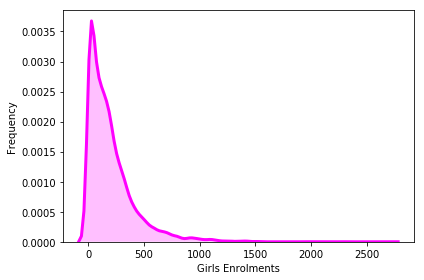

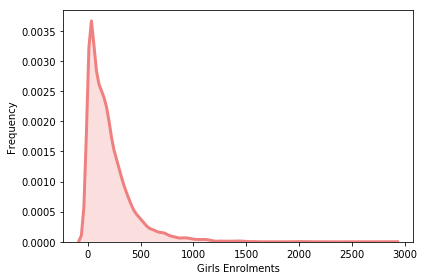

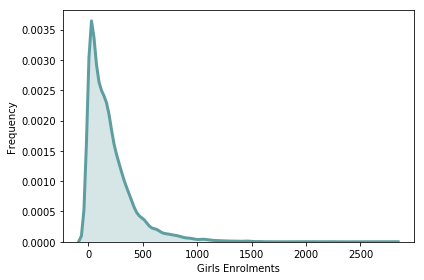

Plotting for -----  Boys Enrolments


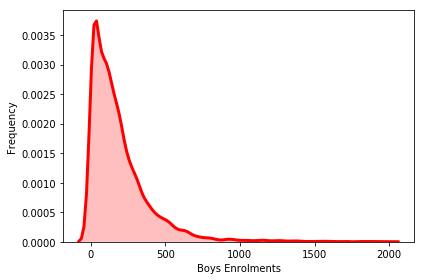

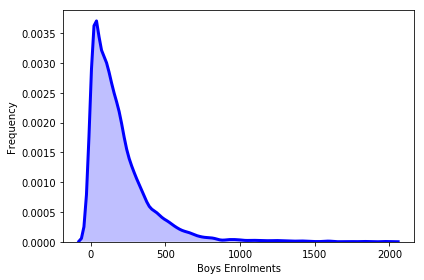

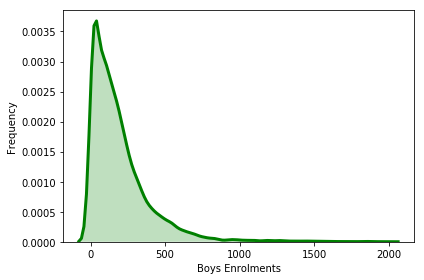

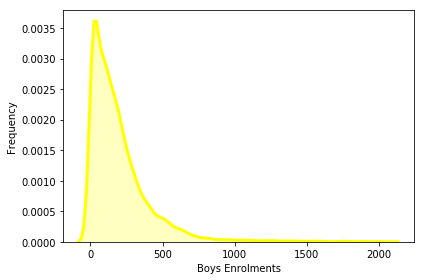

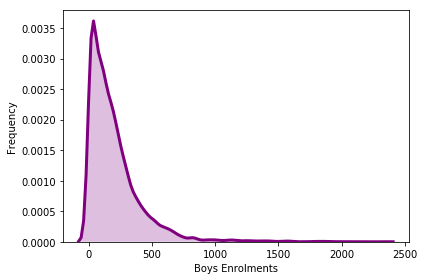

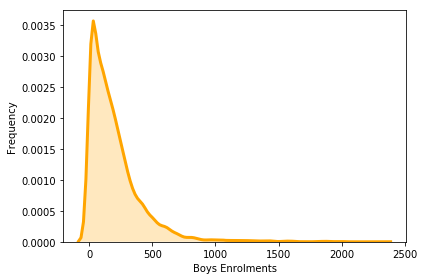

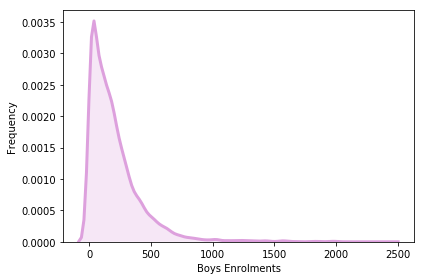

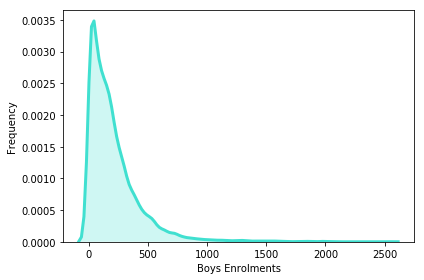

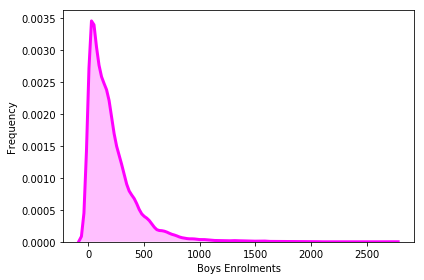

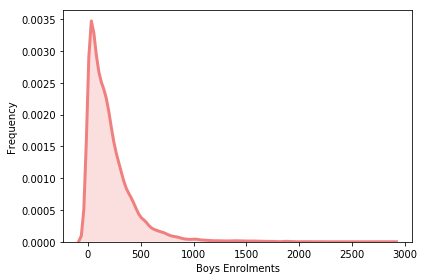

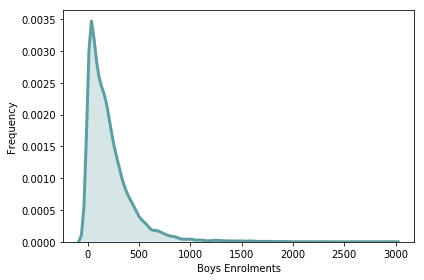

Plotting for -----  Full Time Equivalent Enrolments


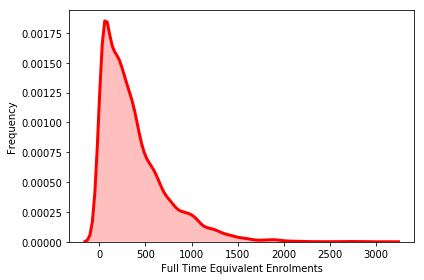

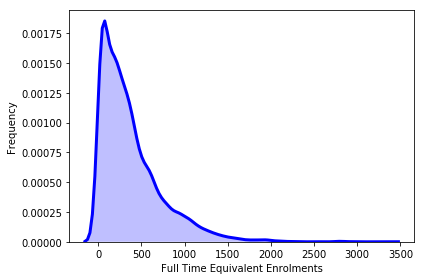

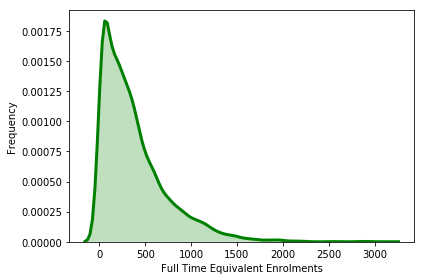

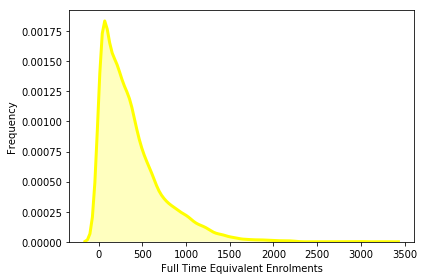

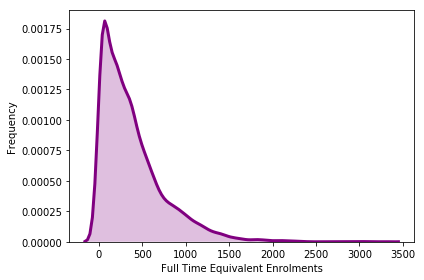

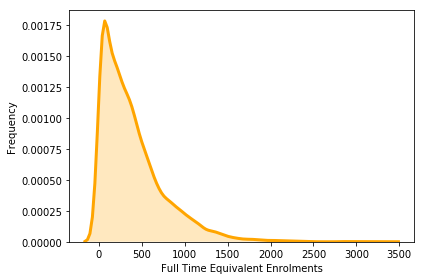

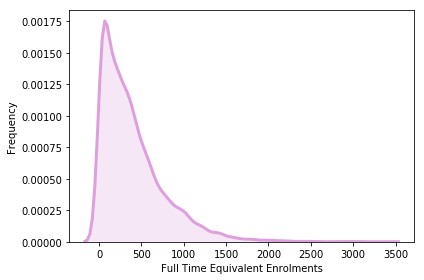

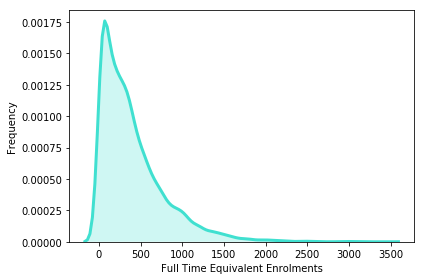

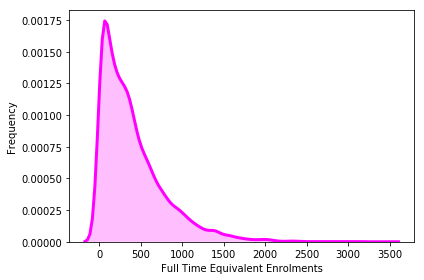

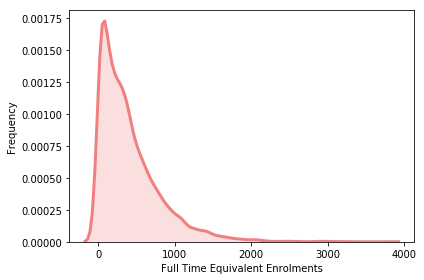

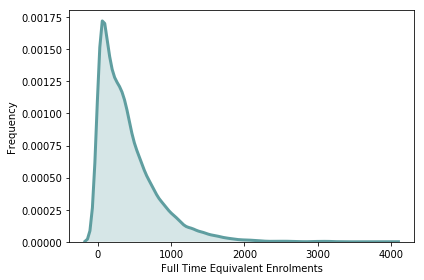

Plotting for -----  Indigenous Enrolments (%)


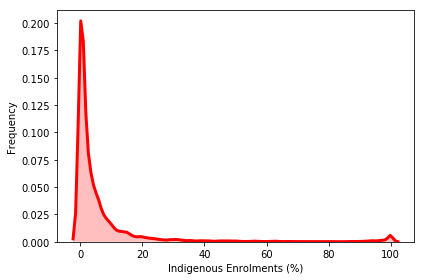

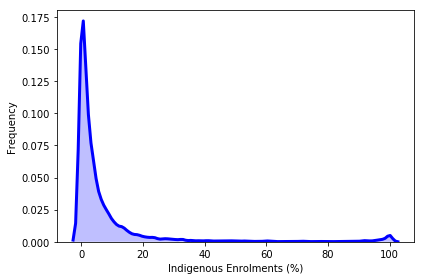

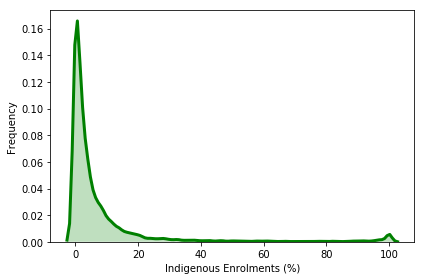

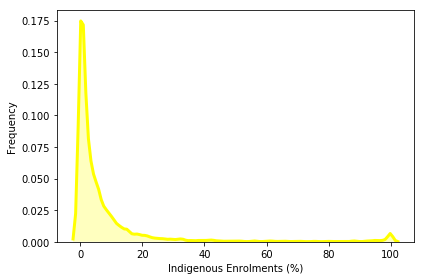

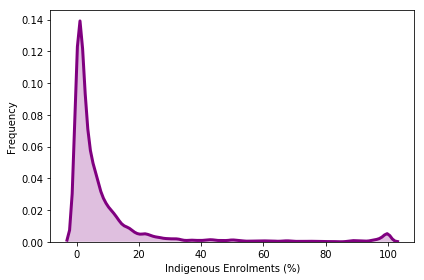

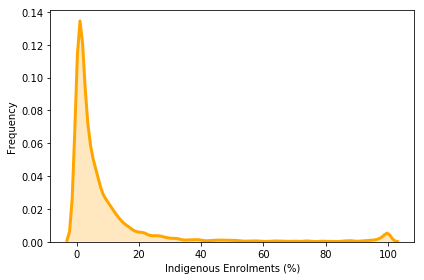

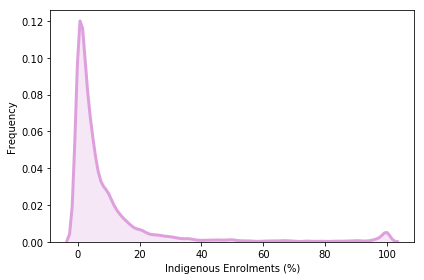

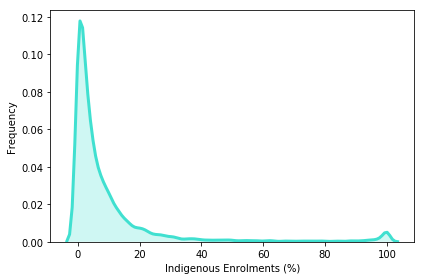

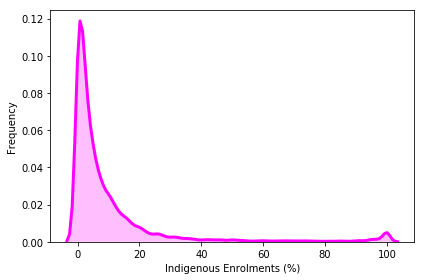

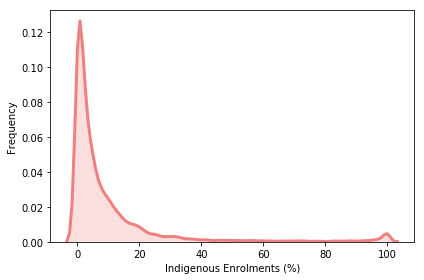

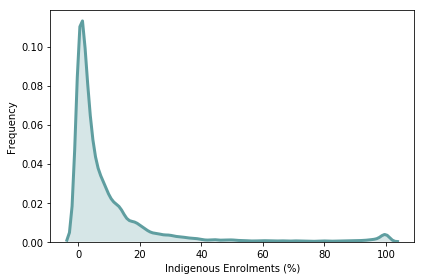

Plotting for -----  Language Background Other Than English (%)


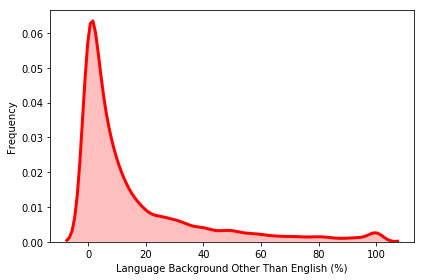

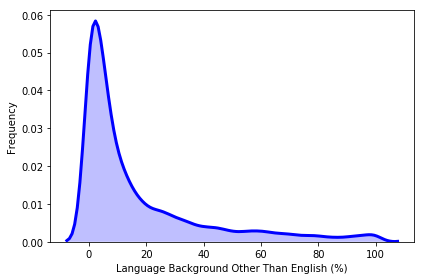

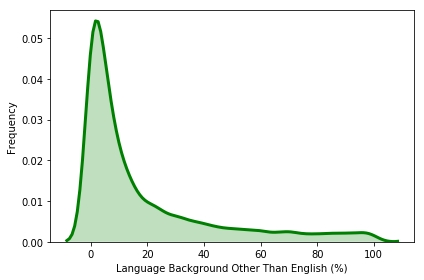

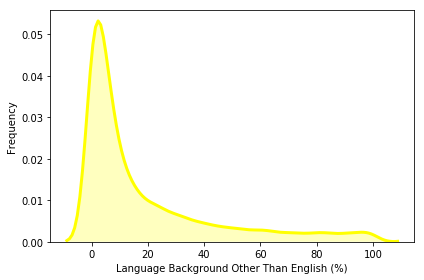

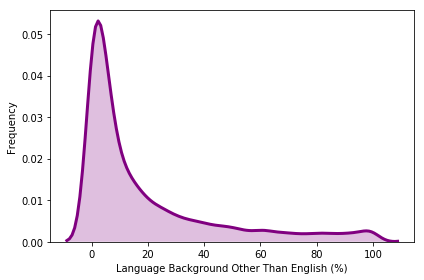

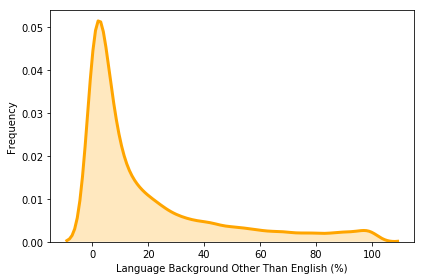

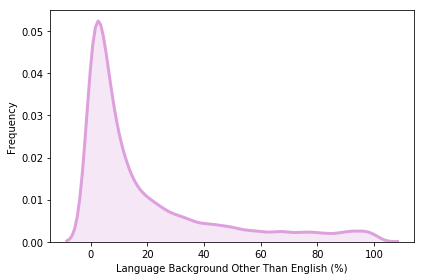

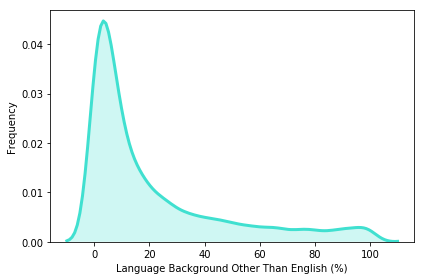

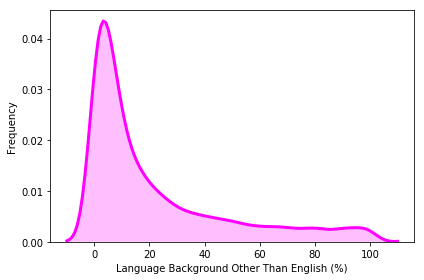

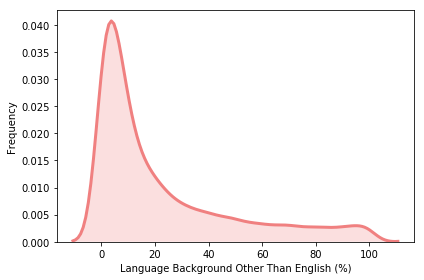

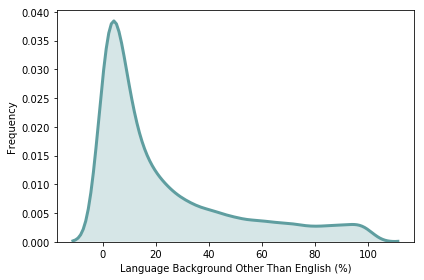

In [66]:
for k in list_params:
    j = 0
    col_dist = ['red', 'blue','green', 'yellow', 'purple', 'orange', 'plum', 'turquoise', 'fuchsia', 'lightcoral', 'cadetblue']
    print('Plotting for ----- ', k)
    for i in year:
        sns.distplot(school_profile[school_profile['Calendar Year'] == i][k], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3}, color = col_dist[j]).set(ylabel = 'Frequency')
        plt.tight_layout()
        plt.show()
        j+=1
    

In [67]:
school_profile.columns

Index(['Calendar Year', 'ACARA SML ID', 'AGE ID', 'School Name', 'Suburb',
       'State', 'Postcode', 'School Sector', 'School Type', 'Campus Type',
       'Rolled Reporting Description', 'School URL', 'Governing Body',
       'Governing Body URL', 'Year Range', 'Geolocation', 'ICSEA',
       'Bottom SEA Quarter (%)', 'Lower Middle SEA Quarter (%)',
       'Upper Middle SEA Quarter (%)', 'Top SEA Quarter (%)', 'Teaching Staff',
       'Full Time Equivalent Teaching Staff', 'Non-Teaching Staff',
       'Full Time Equivalent Non-Teaching Staff', 'Total Enrolments',
       'Girls Enrolments', 'Boys Enrolments',
       'Full Time Equivalent Enrolments', 'Indigenous Enrolments (%)',
       'Language Background Other Than English (%)', 'unique_col'],
      dtype='object')

In [68]:
school_profile['School Type'].unique()

array(['Primary', 'Combined', 'Secondary', 'Special'], dtype=object)

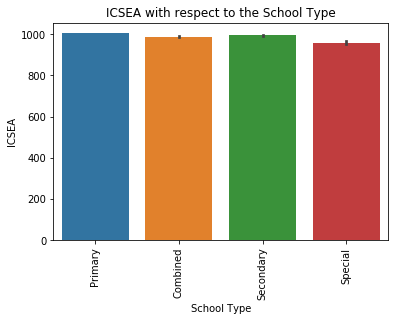

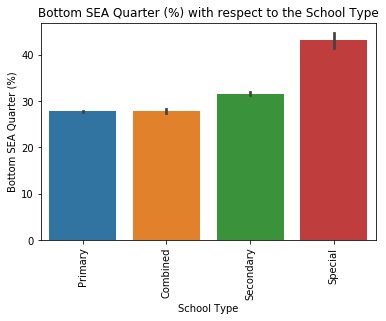

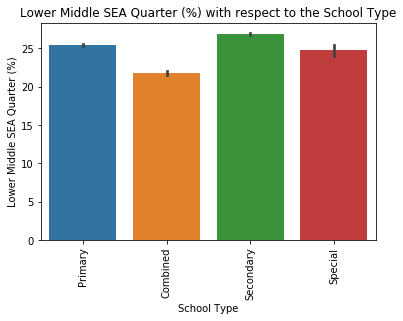

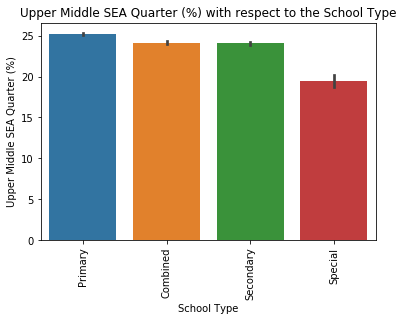

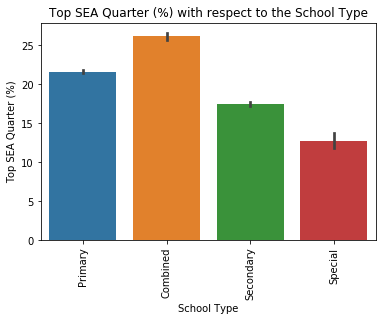

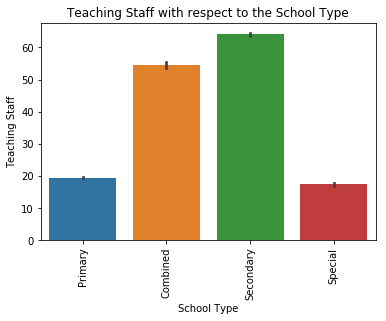

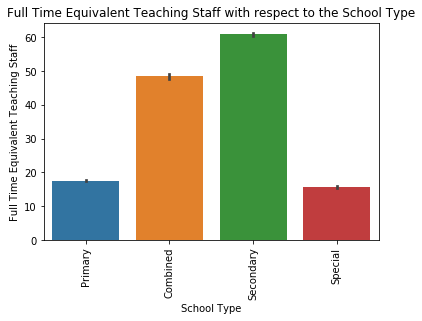

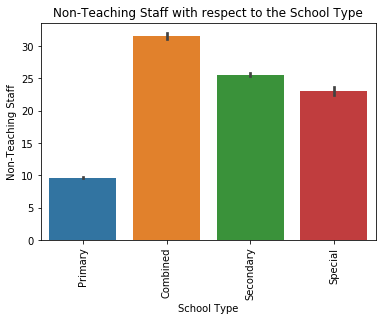

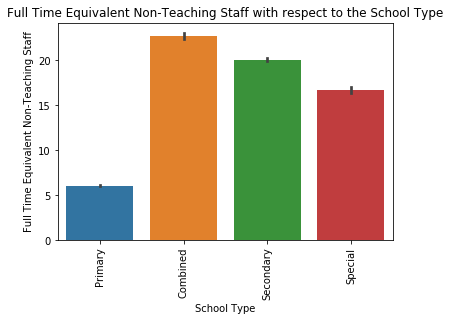

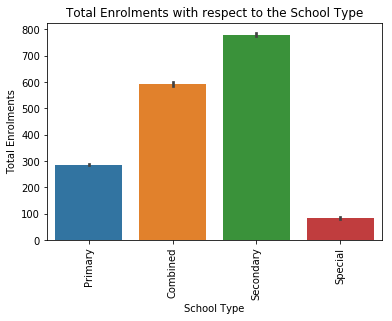

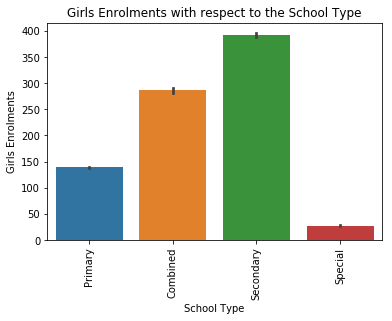

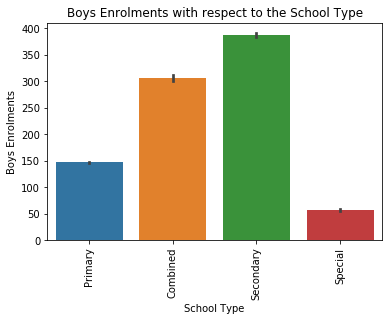

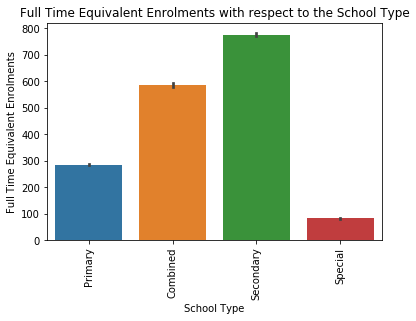

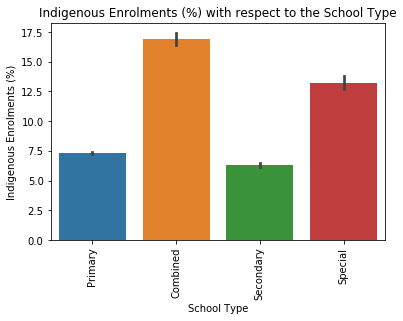

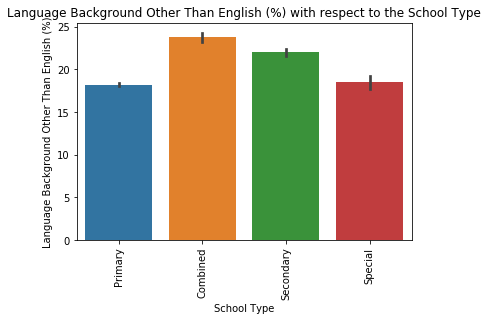

In [69]:
for i in list_params:
    ax = sns.barplot(x=school_profile['School Type'], y=school_profile[i]).set_title( i + ' with respect to the School Type')
    plt.xticks(rotation=90)
    plt.show()

In [70]:
len(school_profile['Governing Body'].unique())

40

In [71]:
school_profile.head()

Calendar Year  ACARA SML ID  AGE ID                     School Name  \
0           2008         40000     3.0  Corpus Christi Catholic School   
1           2009         40000     3.0  Corpus Christi Catholic School   
2           2010         40000     3.0  Corpus Christi Catholic School   
3           2011         40000     3.0  Corpus Christi Catholic School   
4           2012         40000     3.0  Corpus Christi Catholic School   

      Suburb State  Postcode School Sector School Type           Campus Type  \
0  Bellerive   TAS      7018      Catholic     Primary  School Single Entity   
1  Bellerive   TAS      7018      Catholic     Primary  School Single Entity   
2  Bellerive   TAS      7018      Catholic     Primary  School Single Entity   
3  Bellerive   TAS      7018      Catholic     Primary  School Single Entity   
4  Bellerive   TAS      7018      Catholic     Primary  School Single Entity   

   ... Full Time Equivalent Teaching Staff Non-Teaching Staff  \
0  ...                                19.0               12.0   
1  ...                                19.1               15.0   
2  ...                                18.6               18.0   
3  ...                                18.1               16.0   
4  ...                                18.1               16.0   

  Full Time Equivalent Non-Teaching Staff Total Enrolments Girls Enrolments  \
0                                     6.9            410.0            185.0   
1                                     8.7            409.0            184.0   
2                                    10.2            392.0            173.0   
3                                     9.0            385.0            173.0   
4                                     9.4            391.0            185.0   

  Boys Enrolments  Full Time Equivalent Enrolments  Indigenous Enrolments (%)  \
0           225.0                            410.0                        1.0   
1           225.0                            409.0                        2.0   
2           219.0                            392.0                        2.0   
3           212.0                            385.0                        0.0   
4           206.0                            391.0                        1.0   

   Language Background Other Than English (%)  \
0                                         4.0   
1                                         4.0   
2                                         4.0   
3                                         3.0   
4                                         3.0   

                           unique_col  
0  Corpus Christi Catholic School7018  
1  Corpus Christi Catholic School7018  
2  Corpus Christi Catholic School7018  
3  Corpus Christi Catholic School7018  
4  Corpus Christi Catholic School7018  

[5 rows x 32 columns]

In [72]:
import geopy

In [73]:
from geopy.geocoders import Nominatim

In [74]:
locator = Nominatim(user_agent='myGeocoder', timeout=3)

In [75]:
location = locator.geocode('Corpus Christi Catholic School, 7018, Bellerive')

In [76]:
location

Location(Corpus Christi Catholic School, Alma Street, Bellerive, Hobart, City of Clarence, Tasmania, 7018, Australia, (-42.87093725, 147.3720595306331, 0.0))

In [77]:
location = locator.geocode('St Peter Chanel Catholic School, 7330, Smithton, TAS')

In [78]:
location

In [79]:
pd.DataFrame(school_profile.iloc[102133, :])

102133
Calendar Year                                                                            2018
ACARA SML ID                                                                            52687
AGE ID                                                                                    NaN
School Name                                 Australian Industry Trade College - Sunshine C...
Suburb                                                                           Maroochydore
State                                                                                     QLD
Postcode                                                                                 4558
School Sector                                                                     Independent
School Type                                                                         Secondary
Campus Type                                                              School Single Entity
Rolled Reporting Description                                             Individual Reporting
School URL                                                                                NaN
Governing Body                                                                            NaN
Governing Body URL                                                                        NaN
Year Range                                                                                 10
Geolocation                                                                      Major Cities
ICSEA                                                                                     NaN
Bottom SEA Quarter (%)                                                                    NaN
Lower Middle SEA Quarter (%)                                                              NaN
Upper Middle SEA Quarter (%)                                                              NaN
Top SEA Quarter (%)                                                                       NaN
Teaching Staff                                                                              4
Full Time Equivalent Teaching Staff                                                         4
Non-Teaching Staff                                                                          7
Full Time Equivalent Non-Teaching Staff                                                   5.5
Total Enrolments                                                                           46
Girls Enrolments                                                                            5
Boys Enrolments                                                                            41
Full Time Equivalent Enrolments                                                            46
Indigenous Enrolments (%)                                                                   2
Language Background Other Than English (%)                                                NaN
unique_col                                  Australian Industry Trade College - Sunshine C...

In [80]:
school_profile['unique_address'] = school_profile['School Name'].astype(str) + ', ' + school_profile['Postcode'].astype(str) + ', ' + school_profile['Suburb'] + ', ' + school_profile['State']

In [81]:
school_unique = school_profile.drop_duplicates('unique_address')

In [82]:
len(school_unique)

9535

In [83]:
'''
Too much time to execute this code, so commented out

'''

# from geopy.extra.rate_limiter import RateLimiter

# # 1 - conveneint function to delay between geocoding calls
# geocode = RateLimiter(locator.geocode)

# # 2- - create location column
# school_unique['location'] = school_unique['unique_address'].apply(geocode)

# # 3 - create longitude, laatitude and altitude from location column (returns tuple)
# school_unique['point'] = school_unique['location'].apply(lambda loc: tuple(loc.point) if loc else None)

# # 4 - split point column into latitude, longitude and altitude columns
# school_unique[['latitude', 'longitude', 'altitude']] = pd.DataFrame(school_unique['point'].tolist(), index=school_unique.index)

'\nToo much time to execute this code, so commented out\n\n'

In [84]:
school_unique.iloc[11,-1]

'Sacred Heart Catholic School, 7315, Ulverstone, TAS'

In [85]:
# df.iloc[0, df.columns.get_loc('COL_NAME')] = x

In [86]:
school_unique.columns.get_loc('unique_address')

32